(0.0, 8.0)

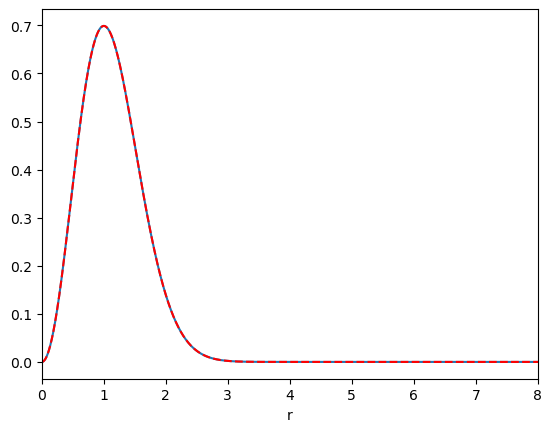

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 100                                           # Truncation ordem

L0 = 5                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))        # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      
                                
    
colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

# Base Matrix (Chebyshev Polinomials TB_2n):

# Grid 1 (CGL)

TB = np.zeros([N+3,N+1])
rTB = np.zeros([N+3,N+1])
rrTB = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB[i,] = np.cos((2*i)*np.arctan(L0/r)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r)))/(L0**2 + r**2)

for i in range(N+3):   
  rrTB[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r)) + r*np.sinh(2*np.arctan(L0/r))))/(L0**2 + r**2)**2

# Grid 2 (CG):

TB_2 = np.zeros([N+3,N+1])
rTB_2 = np.zeros([N+3,N+1])
rrTB_2 = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB_2[i,] = np.cos((2*i)*np.arctan(L0/r2)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB_2[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r2)))/(L0**2 + r2**2)

for i in range(N+3):   
  rrTB_2[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r2)) + r2*np.sinh(2*np.arctan(L0/r2))))/(L0**2 + r2**2)**2


# Base Matrix (Rational Tchebyshev Polinomials SB_2n):

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)           

# Base Matrix (Rational Tchebyshev Polinomials SB_2n+1): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi_2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
            

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.95        # 0.90814 -> Disperse;  #    0.908145    -> AH      (Scalar field amplitude)

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]


Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


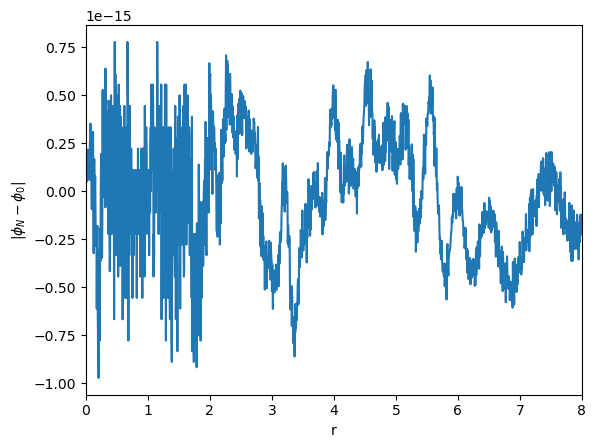

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
# Initial conditions for Alpha:

alpha0=1-A0*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0 - 1, inv_psi)


# Initial conditions for Pi:

# Initial values for K:

K0 = A0/20*r2**2*(np.exp(-(r2)**2/sigma**2) + np.exp(-(r2)**2/sigma**2))



# Base functions of Pi:

TB1 = 1/2*(TB[1:(N+2),:] - TB[0:(N+1),:])         
rTB1 = 1/2*(rTB[1:(N+2),:] - rTB[0:(N+1),:])
rrTB1 = 1/2*(rrTB[1:(N+2),:] - rrTB[0:(N+1),:])


TB1_2 = 1/2*(TB_2[1:(N+2),:] - TB_2[0:(N+1),:])         
rTB1_2 = 1/2*(rTB_2[1:(N+2),:] - rTB_2[0:(N+1),:])
rrTB1_2 = 1/2*(rrTB_2[1:(N+2),:] - rrTB_2[0:(N+1),:])

inv_TB1 = np.linalg.inv(TB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, inv_TB1)
Pi = np.dot(b0, TB1)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * dphi/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 + np.exp(4*Chi[0])*K0[0]/4 - 1/2*np.exp(4*Chi[0])*(Pi[0]**2 + np.exp(-4*Chi[0])*rPhi[0]**2)
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + np.exp(4*Chi[1:N+1])*K0[1:N+1]/4 - 1/2*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2)
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*K0[1:N+1]/4 - 2*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) + 1/2*np.exp(4*Chi[1:N+1])*(4*psi[:,1:N+1]*np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) 
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


In [4]:
np.shape(TB1)

(101, 101)

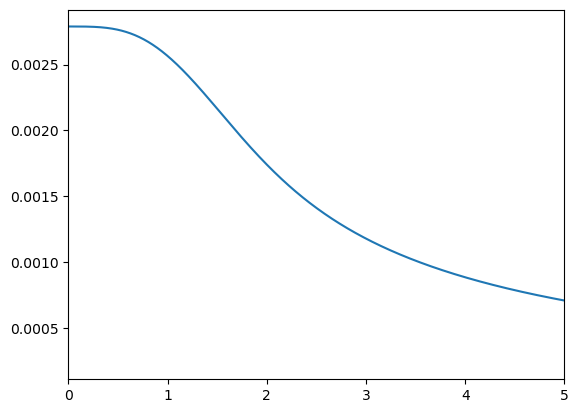

In [5]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr and K: Base functions of Krr and K

# Grid 1: 

SB1 = 1/2*(TB[2:(N+3),:] - TB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rTB[2:(N+3),:] - rTB[0:(N+1),:])
rrSB1 = 1/2*(rrTB[2:(N+3),:] - rrTB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(TB_2[2:(N+3),:] - TB_2[0:(N+1),:])         
rSB1_2 = 1/2*(rTB_2[2:(N+3),:] - rTB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrTB_2[2:(N+3),:] - rrTB_2[0:(N+1),:])

inv_SB1_2 = np.linalg.inv(SB1_2)

fk0 = np.dot(K0, inv_SB1_2)


# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])


for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                 

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))   

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)












In [7]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [8]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

filter1 = np.ones(N+1)
filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [9]:
# Runge Kutta 4th order
import time

init = time.time()

h = 0.0002   # step size
tf = 9

It = int(tf/h)

t = 0

epsilon0 = 0.5
eta0 = 0.3

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, TB1)   
  rPi= np.dot(b0, rTB1)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, TB1_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
  
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1)

  Alpha_2 = 1 + np.dot(al0, psi_2)
  
  K_2 = np.dot(fk0, SB2_2) 
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)

    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
  
    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*(3/2*np.exp(-8*Chi[0])*Krr[0]**2 + 1/2*K[0]**2 - np.exp(-4*Chi[0])*K[0]*Krr[0]) - epsilon0*Pi[0]**2*Alpha[0] - epsilon0*Beta[0]*rK[0] - epsilon0*eta0*K[0]
  dal_int = epsilon0*(rrAlpha[1:N+1] + 2*rAlpha[1:N+1]/r[1:N+1] + 2*rAlpha[1:N+1]*rChi[1:N+1])*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(3/2*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 1/2*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Pi[1:N+1]**2*Alpha[1:N+1] - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = Alpha[0]*K[0]*Pi[0] + 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int =  Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] + Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*(2/r[1:N+1] + 2*rChi[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  
  

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1, psi)      
  rPhi = np.dot(a0 + L1, rpsi)
  rrPhi = np.dot(a0 + L1, rrpsi)

  Pi = np.dot(b0 + N1, TB1)   
  rPi= np.dot(b0 + N1, rTB1)
    
  Chi = np.dot(c0 + K1, psi) 
  rChi = np.dot(c0 + K1, rpsi)
  rrChi = np.dot(c0 + K1, rrpsi) 

  Phi_2 = np.dot(a0 + L1, psi_2)
  rPhi_2 = np.dot(a0 + L1, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1, TB1_2)  
    
  Chi_2 = np.dot(c0 + K1, psi_2)
  rChi_2 = np.dot(c0 + K1, rpsi_2)  
    
  Alpha = 1 + np.dot(al0 + M1, psi)
  rAlpha = np.dot(al0 + M1, rpsi)  
  rrAlpha = np.dot(al0 + M1, rrpsi)

  K = np.dot(fk0 + P1, SB1)
  rK = np.dot(fk0 + P1, rSB1)    
  
  Alpha_2 = 1 + np.dot(al0 + M1, psi_2)
  
  K_2 = np.dot(fk0 + P1, SB2_2)    
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)

  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*(3/2*np.exp(-8*Chi[0])*Krr[0]**2 + 1/2*K[0]**2 - np.exp(-4*Chi[0])*K[0]*Krr[0]) - epsilon0*Pi[0]**2*Alpha[0] - epsilon0*Beta[0]*rK[0] - epsilon0*eta0*K[0]
  dal_int = epsilon0*(rrAlpha[1:N+1] + 2*rAlpha[1:N+1]/r[1:N+1] + 2*rAlpha[1:N+1]*rChi[1:N+1])*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(3/2*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 1/2*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Pi[1:N+1]**2*Alpha[1:N+1] - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = Alpha[0]*K[0]*Pi[0] + 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int =  Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] + Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*(2/r[1:N+1] + 2*rChi[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)
    
  # Third step
  Phi = np.dot(a0 + L2/2, psi)      
  rPhi = np.dot(a0 + L2/2, rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)

  Pi = np.dot(b0 + N2/2, TB1)   
  rPi= np.dot(b0 + N2/2, rTB1)
    
  Chi = np.dot(c0 + K2/2, psi) 
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi) 

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, TB1_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)  

  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1)    
  
  Alpha_2 = 1 + np.dot(al0 + M2/2, psi_2)
  
  K_2 = np.dot(fk0 + P2/2, SB2_2) 
    
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*(3/2*np.exp(-8*Chi[0])*Krr[0]**2 + 1/2*K[0]**2 - np.exp(-4*Chi[0])*K[0]*Krr[0]) - epsilon0*Pi[0]**2*Alpha[0] - epsilon0*Beta[0]*rK[0] - epsilon0*eta0*K[0]
  dal_int = epsilon0*(rrAlpha[1:N+1] + 2*rAlpha[1:N+1]/r[1:N+1] + 2*rAlpha[1:N+1]*rChi[1:N+1])*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(3/2*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 1/2*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Pi[1:N+1]**2*Alpha[1:N+1] - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = Alpha[0]*K[0]*Pi[0] + 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int =  Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] + Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*(2/r[1:N+1] + 2*rChi[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk) 

  # Forth step  
  Phi = np.dot(filter1*a0 + L3, psi)     
  rPhi= np.dot(filter1*a0 + L3 , rpsi)
  rrPhi = np.dot(filter1*a0 + L3, rrpsi)
    
  Pi = np.dot(filter1*b0 + N3, TB1)
  rPi= np.dot(filter1*b0 + N3, rTB1)
    
  Chi = np.dot(filter1*c0 + K3, psi)
  rChi = np.dot(filter1*c0 + K3, rpsi)
  rrChi = np.dot(filter1*c0 + K3, rrpsi)

  Phi_2 = np.dot(filter1*a0 + L3, psi_2)
  rPhi_2 = np.dot(filter1*a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, TB1_2)  
    
  Chi_2 = np.dot(filter1*c0 + K3, psi_2)
  rChi_2 = np.dot(filter1*c0 + K3, rpsi_2) 

  K = np.dot(filter1*fk0 + P3, SB1)
  rK = np.dot(filter1*fk0 + P3, rSB1)    
  
  Alpha_2 = 1 + np.dot(filter1*al0 + M3, psi_2)
  
  K_2 = np.dot(filter1*fk0 + P3, SB2_2)
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(al0, coeforigin))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*(3/2*np.exp(-8*Chi[0])*Krr[0]**2 + 1/2*K[0]**2 - np.exp(-4*Chi[0])*K[0]*Krr[0]) - epsilon0*Pi[0]**2*Alpha[0] - epsilon0*Beta[0]*rK[0] - epsilon0*eta0*K[0]
  dal_int = epsilon0*(rrAlpha[1:N+1] + 2*rAlpha[1:N+1]/r[1:N+1] + 2*rAlpha[1:N+1]*rChi[1:N+1])*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(3/2*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 1/2*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Pi[1:N+1]**2*Alpha[1:N+1] - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = Alpha[0]*K[0]*Pi[0] + 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int =  Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] + Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*(2/r[1:N+1] + 2*rChi[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)  
  
  t = t + h
  
  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()   
    
fim = time.time()    

tex = (fim - init)/60

t1 = np.linspace(0, tf, len(Alpha_origin)) 

0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.08720000000000044
0.08740000000000045
0.08760000000000046
0.08780000000000046
0.08800000000000047
0.08820000000000047
0.08840000000000048
0.08860000000000048
0.08880000000000049
0.0890000000000005
0.0892000000000005
0.0894000000000005
0.08960000000000051
0.08980000000000052
0.09000000000000052
0.09020000000000053
0.09040000000000054
0.09060000000000054
0.09080000000000055
0.09100000000000055
0.09120000000000056
0.09140000000000056
0.09160000000000057
0.09180000000000058
0.09200000000000058
0.09220000000000059
0.09240000000000059
0.0926000000000006
0.0928000000000006
0.09300000000000061
0.09320000000000062
0.09340000000000062
0.09360000000000063
0.09380000000000063
0.09400000000000064
0.09420000000000064
0.09440000000000065
0.09460000000000066
0.09480000000000066
0.09500000000000067
0.09520000000000067
0.09540000000000068
0.09560000000000068
0.09580000000000069
0.0960000000000007
0.0962000000000007
0.09640000000000071
0.09660000000000071
0.09680000000000072
0.09700000000000072
0.09720

0.17860000000000306
0.17880000000000307
0.17900000000000307
0.17920000000000308
0.17940000000000308
0.1796000000000031
0.1798000000000031
0.1800000000000031
0.1802000000000031
0.1804000000000031
0.18060000000000312
0.18080000000000312
0.18100000000000313
0.18120000000000314
0.18140000000000314
0.18160000000000315
0.18180000000000315
0.18200000000000316
0.18220000000000316
0.18240000000000317
0.18260000000000318
0.18280000000000318
0.1830000000000032
0.1832000000000032
0.1834000000000032
0.1836000000000032
0.1838000000000032
0.18400000000000322
0.18420000000000322
0.18440000000000323
0.18460000000000323
0.18480000000000324
0.18500000000000325
0.18520000000000325
0.18540000000000326
0.18560000000000326
0.18580000000000327
0.18600000000000327
0.18620000000000328
0.18640000000000329
0.1866000000000033
0.1868000000000033
0.1870000000000033
0.1872000000000033
0.18740000000000331
0.18760000000000332
0.18780000000000333
0.18800000000000333
0.18820000000000334
0.18840000000000334
0.188600000000

0.26600000000000334
0.2662000000000033
0.2664000000000033
0.2666000000000033
0.26680000000000326
0.26700000000000323
0.2672000000000032
0.2674000000000032
0.26760000000000317
0.26780000000000315
0.2680000000000031
0.2682000000000031
0.2684000000000031
0.26860000000000306
0.26880000000000304
0.269000000000003
0.269200000000003
0.26940000000000297
0.26960000000000295
0.2698000000000029
0.2700000000000029
0.2702000000000029
0.27040000000000286
0.27060000000000284
0.2708000000000028
0.2710000000000028
0.27120000000000277
0.27140000000000275
0.27160000000000273
0.2718000000000027
0.2720000000000027
0.27220000000000266
0.27240000000000264
0.2726000000000026
0.2728000000000026
0.2730000000000026
0.27320000000000255
0.27340000000000253
0.2736000000000025
0.2738000000000025
0.27400000000000246
0.27420000000000244
0.2744000000000024
0.2746000000000024
0.2748000000000024
0.27500000000000235
0.27520000000000233
0.2754000000000023
0.2756000000000023
0.27580000000000227
0.27600000000000224
0.2762000

0.3535999999999937
0.3537999999999937
0.35399999999999365
0.35419999999999363
0.3543999999999936
0.3545999999999936
0.35479999999999356
0.35499999999999354
0.3551999999999935
0.3553999999999935
0.3555999999999935
0.35579999999999345
0.35599999999999343
0.3561999999999934
0.3563999999999934
0.35659999999999337
0.35679999999999334
0.3569999999999933
0.3571999999999933
0.3573999999999933
0.35759999999999326
0.35779999999999323
0.3579999999999932
0.3581999999999932
0.35839999999999317
0.35859999999999315
0.3587999999999931
0.3589999999999931
0.3591999999999931
0.35939999999999306
0.35959999999999304
0.359799999999993
0.359999999999993
0.36019999999999297
0.36039999999999295
0.3605999999999929
0.3607999999999929
0.3609999999999929
0.36119999999999286
0.36139999999999284
0.3615999999999928
0.3617999999999928
0.36199999999999277
0.36219999999999275
0.36239999999999273
0.3625999999999927
0.3627999999999927
0.36299999999999266
0.36319999999999264
0.3633999999999926
0.3635999999999926
0.36379999

0.44499999999998363
0.4451999999999836
0.4453999999999836
0.44559999999998356
0.44579999999998354
0.4459999999999835
0.4461999999999835
0.4463999999999835
0.44659999999998345
0.44679999999998343
0.4469999999999834
0.4471999999999834
0.44739999999998337
0.44759999999998334
0.4477999999999833
0.4479999999999833
0.4481999999999833
0.44839999999998326
0.44859999999998323
0.4487999999999832
0.4489999999999832
0.44919999999998317
0.44939999999998315
0.4495999999999831
0.4497999999999831
0.4499999999999831
0.45019999999998306
0.45039999999998304
0.450599999999983
0.450799999999983
0.45099999999998297
0.45119999999998295
0.4513999999999829
0.4515999999999829
0.4517999999999829
0.45199999999998286
0.45219999999998284
0.4523999999999828
0.4525999999999828
0.45279999999998277
0.45299999999998275
0.45319999999998273
0.4533999999999827
0.4535999999999827
0.45379999999998266
0.45399999999998264
0.4541999999999826
0.4543999999999826
0.4545999999999826
0.45479999999998255
0.45499999999998253
0.4551999

0.5313999999999741
0.5315999999999741
0.5317999999999741
0.531999999999974
0.532199999999974
0.532399999999974
0.532599999999974
0.532799999999974
0.5329999999999739
0.5331999999999739
0.5333999999999739
0.5335999999999739
0.5337999999999739
0.5339999999999738
0.5341999999999738
0.5343999999999738
0.5345999999999738
0.5347999999999737
0.5349999999999737
0.5351999999999737
0.5353999999999737
0.5355999999999737
0.5357999999999736
0.5359999999999736
0.5361999999999736
0.5363999999999736
0.5365999999999735
0.5367999999999735
0.5369999999999735
0.5371999999999735
0.5373999999999735
0.5375999999999734
0.5377999999999734
0.5379999999999734
0.5381999999999734
0.5383999999999733
0.5385999999999733
0.5387999999999733
0.5389999999999733
0.5391999999999733
0.5393999999999732
0.5395999999999732
0.5397999999999732
0.5399999999999732
0.5401999999999731
0.5403999999999731
0.5405999999999731
0.5407999999999731
0.5409999999999731
0.541199999999973
0.541399999999973
0.541599999999973
0.541799999999973
0.

0.6225999999999641
0.622799999999964
0.622999999999964
0.623199999999964
0.623399999999964
0.623599999999964
0.6237999999999639
0.6239999999999639
0.6241999999999639
0.6243999999999639
0.6245999999999639
0.6247999999999638
0.6249999999999638
0.6251999999999638
0.6253999999999638
0.6255999999999637
0.6257999999999637
0.6259999999999637
0.6261999999999637
0.6263999999999637
0.6265999999999636
0.6267999999999636
0.6269999999999636
0.6271999999999636
0.6273999999999635
0.6275999999999635
0.6277999999999635
0.6279999999999635
0.6281999999999635
0.6283999999999634
0.6285999999999634
0.6287999999999634
0.6289999999999634
0.6291999999999633
0.6293999999999633
0.6295999999999633
0.6297999999999633
0.6299999999999633
0.6301999999999632
0.6303999999999632
0.6305999999999632
0.6307999999999632
0.6309999999999631
0.6311999999999631
0.6313999999999631
0.6315999999999631
0.6317999999999631
0.631999999999963
0.632199999999963
0.632399999999963
0.632599999999963
0.632799999999963
0.6329999999999629
0.6

0.7121999999999542
0.7123999999999542
0.7125999999999542
0.7127999999999541
0.7129999999999541
0.7131999999999541
0.7133999999999541
0.713599999999954
0.713799999999954
0.713999999999954
0.714199999999954
0.714399999999954
0.7145999999999539
0.7147999999999539
0.7149999999999539
0.7151999999999539
0.7153999999999539
0.7155999999999538
0.7157999999999538
0.7159999999999538
0.7161999999999538
0.7163999999999537
0.7165999999999537
0.7167999999999537
0.7169999999999537
0.7171999999999537
0.7173999999999536
0.7175999999999536
0.7177999999999536
0.7179999999999536
0.7181999999999535
0.7183999999999535
0.7185999999999535
0.7187999999999535
0.7189999999999535
0.7191999999999534
0.7193999999999534
0.7195999999999534
0.7197999999999534
0.7199999999999533
0.7201999999999533
0.7203999999999533
0.7205999999999533
0.7207999999999533
0.7209999999999532
0.7211999999999532
0.7213999999999532
0.7215999999999532
0.7217999999999531
0.7219999999999531
0.7221999999999531
0.7223999999999531
0.722599999999953

0.8005999999999445
0.8007999999999444
0.8009999999999444
0.8011999999999444
0.8013999999999444
0.8015999999999444
0.8017999999999443
0.8019999999999443
0.8021999999999443
0.8023999999999443
0.8025999999999442
0.8027999999999442
0.8029999999999442
0.8031999999999442
0.8033999999999442
0.8035999999999441
0.8037999999999441
0.8039999999999441
0.8041999999999441
0.804399999999944
0.804599999999944
0.804799999999944
0.804999999999944
0.805199999999944
0.8053999999999439
0.8055999999999439
0.8057999999999439
0.8059999999999439
0.8061999999999439
0.8063999999999438
0.8065999999999438
0.8067999999999438
0.8069999999999438
0.8071999999999437
0.8073999999999437
0.8075999999999437
0.8077999999999437
0.8079999999999437
0.8081999999999436
0.8083999999999436
0.8085999999999436
0.8087999999999436
0.8089999999999435
0.8091999999999435
0.8093999999999435
0.8095999999999435
0.8097999999999435
0.8099999999999434
0.8101999999999434
0.8103999999999434
0.8105999999999434
0.8107999999999433
0.810999999999943

0.8943999999999341
0.8945999999999341
0.8947999999999341
0.8949999999999341
0.895199999999934
0.895399999999934
0.895599999999934
0.895799999999934
0.895999999999934
0.8961999999999339
0.8963999999999339
0.8965999999999339
0.8967999999999339
0.8969999999999339
0.8971999999999338
0.8973999999999338
0.8975999999999338
0.8977999999999338
0.8979999999999337
0.8981999999999337
0.8983999999999337
0.8985999999999337
0.8987999999999337
0.8989999999999336
0.8991999999999336
0.8993999999999336
0.8995999999999336
0.8997999999999335
0.8999999999999335
0.9001999999999335
0.9003999999999335
0.9005999999999335
0.9007999999999334
0.9009999999999334
0.9011999999999334
0.9013999999999334
0.9015999999999333
0.9017999999999333
0.9019999999999333
0.9021999999999333
0.9023999999999333
0.9025999999999332
0.9027999999999332
0.9029999999999332
0.9031999999999332
0.9033999999999331
0.9035999999999331
0.9037999999999331
0.9039999999999331
0.9041999999999331
0.904399999999933
0.904599999999933
0.904799999999933
0

0.9843999999999242
0.9845999999999242
0.9847999999999242
0.9849999999999242
0.9851999999999241
0.9853999999999241
0.9855999999999241
0.9857999999999241
0.985999999999924
0.986199999999924
0.986399999999924
0.986599999999924
0.986799999999924
0.9869999999999239
0.9871999999999239
0.9873999999999239
0.9875999999999239
0.9877999999999239
0.9879999999999238
0.9881999999999238
0.9883999999999238
0.9885999999999238
0.9887999999999237
0.9889999999999237
0.9891999999999237
0.9893999999999237
0.9895999999999237
0.9897999999999236
0.9899999999999236
0.9901999999999236
0.9903999999999236
0.9905999999999235
0.9907999999999235
0.9909999999999235
0.9911999999999235
0.9913999999999235
0.9915999999999234
0.9917999999999234
0.9919999999999234
0.9921999999999234
0.9923999999999233
0.9925999999999233
0.9927999999999233
0.9929999999999233
0.9931999999999233
0.9933999999999232
0.9935999999999232
0.9937999999999232
0.9939999999999232
0.9941999999999231
0.9943999999999231
0.9945999999999231
0.994799999999923

1.0733999999999144
1.0735999999999144
1.0737999999999144
1.0739999999999144
1.0741999999999143
1.0743999999999143
1.0745999999999143
1.0747999999999143
1.0749999999999142
1.0751999999999142
1.0753999999999142
1.0755999999999142
1.0757999999999142
1.0759999999999141
1.0761999999999141
1.076399999999914
1.076599999999914
1.076799999999914
1.076999999999914
1.077199999999914
1.077399999999914
1.077599999999914
1.077799999999914
1.077999999999914
1.078199999999914
1.0783999999999139
1.0785999999999138
1.0787999999999138
1.0789999999999138
1.0791999999999138
1.0793999999999138
1.0795999999999137
1.0797999999999137
1.0799999999999137
1.0801999999999137
1.0803999999999137
1.0805999999999136
1.0807999999999136
1.0809999999999136
1.0811999999999136
1.0813999999999135
1.0815999999999135
1.0817999999999135
1.0819999999999135
1.0821999999999135
1.0823999999999134
1.0825999999999134
1.0827999999999134
1.0829999999999134
1.0831999999999133
1.0833999999999133
1.0835999999999133
1.0837999999999133
1.0

1.1667999999999041
1.1669999999999041
1.167199999999904
1.167399999999904
1.167599999999904
1.167799999999904
1.167999999999904
1.168199999999904
1.168399999999904
1.168599999999904
1.168799999999904
1.168999999999904
1.1691999999999039
1.1693999999999038
1.1695999999999038
1.1697999999999038
1.1699999999999038
1.1701999999999038
1.1703999999999037
1.1705999999999037
1.1707999999999037
1.1709999999999037
1.1711999999999037
1.1713999999999036
1.1715999999999036
1.1717999999999036
1.1719999999999036
1.1721999999999035
1.1723999999999035
1.1725999999999035
1.1727999999999035
1.1729999999999035
1.1731999999999034
1.1733999999999034
1.1735999999999034
1.1737999999999034
1.1739999999999033
1.1741999999999033
1.1743999999999033
1.1745999999999033
1.1747999999999033
1.1749999999999032
1.1751999999999032
1.1753999999999032
1.1755999999999032
1.1757999999999031
1.1759999999999031
1.176199999999903
1.176399999999903
1.176599999999903
1.176799999999903
1.176999999999903
1.177199999999903
1.1773999

1.2639999999998934
1.2641999999998934
1.2643999999998934
1.2645999999998934
1.2647999999998933
1.2649999999998933
1.2651999999998933
1.2653999999998933
1.2655999999998933
1.2657999999998932
1.2659999999998932
1.2661999999998932
1.2663999999998932
1.2665999999998931
1.2667999999998931
1.266999999999893
1.267199999999893
1.267399999999893
1.267599999999893
1.267799999999893
1.267999999999893
1.268199999999893
1.268399999999893
1.268599999999893
1.268799999999893
1.2689999999998929
1.2691999999998929
1.2693999999998928
1.2695999999998928
1.2697999999998928
1.2699999999998928
1.2701999999998927
1.2703999999998927
1.2705999999998927
1.2707999999998927
1.2709999999998927
1.2711999999998926
1.2713999999998926
1.2715999999998926
1.2717999999998926
1.2719999999998925
1.2721999999998925
1.2723999999998925
1.2725999999998925
1.2727999999998925
1.2729999999998924
1.2731999999998924
1.2733999999998924
1.2735999999998924
1.2737999999998924
1.2739999999998923
1.2741999999998923
1.2743999999998923
1.2

1.3637999999998824
1.3639999999998824
1.3641999999998824
1.3643999999998824
1.3645999999998824
1.3647999999998823
1.3649999999998823
1.3651999999998823
1.3653999999998823
1.3655999999998822
1.3657999999998822
1.3659999999998822
1.3661999999998822
1.3663999999998822
1.3665999999998821
1.366799999999882
1.366999999999882
1.367199999999882
1.367399999999882
1.367599999999882
1.367799999999882
1.367999999999882
1.368199999999882
1.368399999999882
1.368599999999882
1.3687999999998819
1.3689999999998819
1.3691999999998818
1.3693999999998818
1.3695999999998818
1.3697999999998818
1.3699999999998818
1.3701999999998817
1.3703999999998817
1.3705999999998817
1.3707999999998817
1.3709999999998816
1.3711999999998816
1.3713999999998816
1.3715999999998816
1.3717999999998816
1.3719999999998815
1.3721999999998815
1.3723999999998815
1.3725999999998815
1.3727999999998814
1.3729999999998814
1.3731999999998814
1.3733999999998814
1.3735999999998814
1.3737999999998813
1.3739999999998813
1.3741999999998813
1.3

1.4613999999998717
1.4615999999998717
1.4617999999998716
1.4619999999998716
1.4621999999998716
1.4623999999998716
1.4625999999998716
1.4627999999998715
1.4629999999998715
1.4631999999998715
1.4633999999998715
1.4635999999998714
1.4637999999998714
1.4639999999998714
1.4641999999998714
1.4643999999998714
1.4645999999998713
1.4647999999998713
1.4649999999998713
1.4651999999998713
1.4653999999998713
1.4655999999998712
1.4657999999998712
1.4659999999998712
1.4661999999998712
1.4663999999998711
1.4665999999998711
1.466799999999871
1.466999999999871
1.467199999999871
1.467399999999871
1.467599999999871
1.467799999999871
1.467999999999871
1.468199999999871
1.468399999999871
1.468599999999871
1.4687999999998709
1.4689999999998709
1.4691999999998708
1.4693999999998708
1.4695999999998708
1.4697999999998708
1.4699999999998707
1.4701999999998707
1.4703999999998707
1.4705999999998707
1.4707999999998707
1.4709999999998706
1.4711999999998706
1.4713999999998706
1.4715999999998706
1.4717999999998705
1.4

1.5549999999998614
1.5551999999998614
1.5553999999998613
1.5555999999998613
1.5557999999998613
1.5559999999998613
1.5561999999998612
1.5563999999998612
1.5565999999998612
1.5567999999998612
1.5569999999998612
1.5571999999998611
1.5573999999998611
1.557599999999861
1.557799999999861
1.557999999999861
1.558199999999861
1.558399999999861
1.558599999999861
1.558799999999861
1.558999999999861
1.559199999999861
1.559399999999861
1.5595999999998609
1.5597999999998609
1.5599999999998608
1.5601999999998608
1.5603999999998608
1.5605999999998608
1.5607999999998607
1.5609999999998607
1.5611999999998607
1.5613999999998607
1.5615999999998607
1.5617999999998606
1.5619999999998606
1.5621999999998606
1.5623999999998606
1.5625999999998605
1.5627999999998605
1.5629999999998605
1.5631999999998605
1.5633999999998605
1.5635999999998604
1.5637999999998604
1.5639999999998604
1.5641999999998604
1.5643999999998603
1.5645999999998603
1.5647999999998603
1.5649999999998603
1.5651999999998603
1.5653999999998602
1.5

1.6427999999998517
1.6429999999998517
1.6431999999998517
1.6433999999998516
1.6435999999998516
1.6437999999998516
1.6439999999998516
1.6441999999998516
1.6443999999998515
1.6445999999998515
1.6447999999998515
1.6449999999998515
1.6451999999998514
1.6453999999998514
1.6455999999998514
1.6457999999998514
1.6459999999998514
1.6461999999998513
1.6463999999998513
1.6465999999998513
1.6467999999998513
1.6469999999998512
1.6471999999998512
1.6473999999998512
1.6475999999998512
1.6477999999998512
1.6479999999998511
1.6481999999998511
1.648399999999851
1.648599999999851
1.648799999999851
1.648999999999851
1.649199999999851
1.649399999999851
1.649599999999851
1.649799999999851
1.649999999999851
1.650199999999851
1.6503999999998509
1.6505999999998509
1.6507999999998508
1.6509999999998508
1.6511999999998508
1.6513999999998508
1.6515999999998507
1.6517999999998507
1.6519999999998507
1.6521999999998507
1.6523999999998507
1.6525999999998506
1.6527999999998506
1.6529999999998506
1.6531999999998506
1.6

1.739399999999841
1.739599999999841
1.739799999999841
1.739999999999841
1.740199999999841
1.740399999999841
1.740599999999841
1.740799999999841
1.740999999999841
1.7411999999998409
1.7413999999998409
1.7415999999998408
1.7417999999998408
1.7419999999998408
1.7421999999998408
1.7423999999998407
1.7425999999998407
1.7427999999998407
1.7429999999998407
1.7431999999998407
1.7433999999998406
1.7435999999998406
1.7437999999998406
1.7439999999998406
1.7441999999998405
1.7443999999998405
1.7445999999998405
1.7447999999998405
1.7449999999998405
1.7451999999998404
1.7453999999998404
1.7455999999998404
1.7457999999998404
1.7459999999998403
1.7461999999998403
1.7463999999998403
1.7465999999998403
1.7467999999998403
1.7469999999998402
1.7471999999998402
1.7473999999998402
1.7475999999998402
1.7477999999998401
1.7479999999998401
1.74819999999984
1.74839999999984
1.74859999999984
1.74879999999984
1.74899999999984
1.74919999999984
1.74939999999984
1.74959999999984
1.74979999999984
1.74999999999984
1.7

1.8279999999998313
1.8281999999998313
1.8283999999998313
1.8285999999998312
1.8287999999998312
1.8289999999998312
1.8291999999998312
1.8293999999998312
1.8295999999998311
1.8297999999998311
1.829999999999831
1.830199999999831
1.830399999999831
1.830599999999831
1.830799999999831
1.830999999999831
1.831199999999831
1.831399999999831
1.831599999999831
1.831799999999831
1.8319999999998309
1.8321999999998309
1.8323999999998308
1.8325999999998308
1.8327999999998308
1.8329999999998308
1.8331999999998307
1.8333999999998307
1.8335999999998307
1.8337999999998307
1.8339999999998307
1.8341999999998306
1.8343999999998306
1.8345999999998306
1.8347999999998306
1.8349999999998305
1.8351999999998305
1.8353999999998305
1.8355999999998305
1.8357999999998305
1.8359999999998304
1.8361999999998304
1.8363999999998304
1.8365999999998304
1.8367999999998303
1.8369999999998303
1.8371999999998303
1.8373999999998303
1.8375999999998303
1.8377999999998302
1.8379999999998302
1.8381999999998302
1.8383999999998302
1.8

1.921599999999821
1.921799999999821
1.921999999999821
1.922199999999821
1.922399999999821
1.922599999999821
1.9227999999998209
1.9229999999998209
1.9231999999998208
1.9233999999998208
1.9235999999998208
1.9237999999998208
1.9239999999998207
1.9241999999998207
1.9243999999998207
1.9245999999998207
1.9247999999998207
1.9249999999998206
1.9251999999998206
1.9253999999998206
1.9255999999998206
1.9257999999998205
1.9259999999998205
1.9261999999998205
1.9263999999998205
1.9265999999998205
1.9267999999998204
1.9269999999998204
1.9271999999998204
1.9273999999998204
1.9275999999998203
1.9277999999998203
1.9279999999998203
1.9281999999998203
1.9283999999998203
1.9285999999998202
1.9287999999998202
1.9289999999998202
1.9291999999998202
1.9293999999998201
1.9295999999998201
1.92979999999982
1.92999999999982
1.93019999999982
1.93039999999982
1.93059999999982
1.93079999999982
1.93099999999982
1.93119999999982
1.93139999999982
1.93159999999982
1.9317999999998199
1.9319999999998199
1.9321999999998198


2.0121999999998113
2.0123999999998112
2.012599999999811
2.012799999999811
2.012999999999811
2.013199999999811
2.013399999999811
2.013599999999811
2.013799999999811
2.013999999999811
2.014199999999811
2.014399999999811
2.014599999999811
2.014799999999811
2.014999999999811
2.015199999999811
2.015399999999811
2.015599999999811
2.015799999999811
2.015999999999811
2.016199999999811
2.016399999999811
2.0165999999998108
2.0167999999998107
2.0169999999998107
2.0171999999998107
2.0173999999998107
2.0175999999998107
2.0177999999998106
2.0179999999998106
2.0181999999998106
2.0183999999998106
2.0185999999998105
2.0187999999998105
2.0189999999998105
2.0191999999998105
2.0193999999998105
2.0195999999998104
2.0197999999998104
2.0199999999998104
2.0201999999998104
2.0203999999998103
2.0205999999998103
2.0207999999998103
2.0209999999998103
2.0211999999998103
2.0213999999998102
2.02159999999981
2.02179999999981
2.02199999999981
2.02219999999981
2.02239999999981
2.02259999999981
2.02279999999981
2.022999

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11040\257337318.py:65: RuntimeWarning: overflow encountered in exp
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11040\257337318.py:65: RuntimeWarning: invalid value encountered in subtract
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11040\257337318.py:75: RuntimeWarning: overflow encountered in exp
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11040\257337318.py:84: RuntimeWarning: overflow encountered in exp
  dal_int = epsilon0*(rrAlpha[1:N+1] + 2*rAlpha[1:N+1]/r[1:N+1] + 2*rAlpha[1:N+1]*rChi[1:N+1])*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(3/2*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 1/2*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Pi[1:N+1]**2*Alpha[1:N+1] - epsilon0*Beta[1

2.0273999999998096
2.0275999999998096
2.0277999999998095
2.0279999999998095
2.0281999999998095
2.0283999999998095
2.0285999999998094
2.0287999999998094
2.0289999999998094
2.0291999999998094
2.0293999999998094
2.0295999999998093
2.0297999999998093
2.0299999999998093
2.0301999999998093
2.0303999999998092
2.0305999999998092
2.030799999999809
2.030999999999809
2.031199999999809
2.031399999999809
2.031599999999809
2.031799999999809
2.031999999999809
2.032199999999809
2.032399999999809
2.032599999999809
2.032799999999809
2.032999999999809
2.033199999999809
2.033399999999809
2.033599999999809
2.033799999999809
2.033999999999809
2.034199999999809
2.034399999999809
2.034599999999809
2.0347999999998088
2.0349999999998087
2.0351999999998087
2.0353999999998087
2.0355999999998087
2.0357999999998087
2.0359999999998086
2.0361999999998086
2.0363999999998086
2.0365999999998086
2.0367999999998085
2.0369999999998085
2.0371999999998085
2.0373999999998085
2.0375999999998085
2.0377999999998084
2.03799999999

2.121599999999799
2.121799999999799
2.121999999999799
2.122199999999799
2.122399999999799
2.122599999999799
2.122799999999799
2.122999999999799
2.123199999999799
2.123399999999799
2.123599999999799
2.123799999999799
2.123999999999799
2.124199999999799
2.124399999999799
2.124599999999799
2.124799999999799
2.124999999999799
2.125199999999799
2.125399999999799
2.1255999999997988
2.1257999999997987
2.1259999999997987
2.1261999999997987
2.1263999999997987
2.1265999999997987
2.1267999999997986
2.1269999999997986
2.1271999999997986
2.1273999999997986
2.1275999999997985
2.1277999999997985
2.1279999999997985
2.1281999999997985
2.1283999999997985
2.1285999999997984
2.1287999999997984
2.1289999999997984
2.1291999999997984
2.1293999999997983
2.1295999999997983
2.1297999999997983
2.1299999999997983
2.1301999999997983
2.1303999999997982
2.130599999999798
2.130799999999798
2.130999999999798
2.131199999999798
2.131399999999798
2.131599999999798
2.131799999999798
2.131999999999798
2.132199999999798
2.1

2.2121999999997892
2.212399999999789
2.212599999999789
2.212799999999789
2.212999999999789
2.213199999999789
2.213399999999789
2.213599999999789
2.213799999999789
2.213999999999789
2.214199999999789
2.214399999999789
2.214599999999789
2.214799999999789
2.214999999999789
2.215199999999789
2.215399999999789
2.215599999999789
2.215799999999789
2.215999999999789
2.216199999999789
2.2163999999997888
2.2165999999997887
2.2167999999997887
2.2169999999997887
2.2171999999997887
2.2173999999997887
2.2175999999997886
2.2177999999997886
2.2179999999997886
2.2181999999997886
2.2183999999997885
2.2185999999997885
2.2187999999997885
2.2189999999997885
2.2191999999997885
2.2193999999997884
2.2195999999997884
2.2197999999997884
2.2199999999997884
2.2201999999997883
2.2203999999997883
2.2205999999997883
2.2207999999997883
2.2209999999997883
2.2211999999997882
2.221399999999788
2.221599999999788
2.221799999999788
2.221999999999788
2.222199999999788
2.222399999999788
2.222599999999788
2.222799999999788
2.

2.3093999999997785
2.3095999999997785
2.3097999999997785
2.3099999999997785
2.3101999999997784
2.3103999999997784
2.3105999999997784
2.3107999999997784
2.3109999999997783
2.3111999999997783
2.3113999999997783
2.3115999999997783
2.3117999999997783
2.3119999999997782
2.312199999999778
2.312399999999778
2.312599999999778
2.312799999999778
2.312999999999778
2.313199999999778
2.313399999999778
2.313599999999778
2.313799999999778
2.313999999999778
2.314199999999778
2.314399999999778
2.314599999999778
2.314799999999778
2.314999999999778
2.315199999999778
2.315399999999778
2.315599999999778
2.315799999999778
2.315999999999778
2.3161999999997778
2.3163999999997777
2.3165999999997777
2.3167999999997777
2.3169999999997777
2.3171999999997777
2.3173999999997776
2.3175999999997776
2.3177999999997776
2.3179999999997776
2.3181999999997775
2.3183999999997775
2.3185999999997775
2.3187999999997775
2.3189999999997775
2.3191999999997774
2.3193999999997774
2.3195999999997774
2.3197999999997774
2.31999999999

2.4017999999997683
2.4019999999997683
2.4021999999997683
2.4023999999997683
2.4025999999997683
2.4027999999997682
2.402999999999768
2.403199999999768
2.403399999999768
2.403599999999768
2.403799999999768
2.403999999999768
2.404199999999768
2.404399999999768
2.404599999999768
2.404799999999768
2.404999999999768
2.405199999999768
2.405399999999768
2.405599999999768
2.405799999999768
2.405999999999768
2.406199999999768
2.406399999999768
2.406599999999768
2.406799999999768
2.4069999999997678
2.4071999999997677
2.4073999999997677
2.4075999999997677
2.4077999999997677
2.4079999999997677
2.4081999999997676
2.4083999999997676
2.4085999999997676
2.4087999999997676
2.4089999999997675
2.4091999999997675
2.4093999999997675
2.4095999999997675
2.4097999999997675
2.4099999999997674
2.4101999999997674
2.4103999999997674
2.4105999999997674
2.4107999999997674
2.4109999999997673
2.4111999999997673
2.4113999999997673
2.4115999999997673
2.4117999999997672
2.411999999999767
2.412199999999767
2.4123999999997

2.4921999999997584
2.4923999999997584
2.4925999999997583
2.4927999999997583
2.4929999999997583
2.4931999999997583
2.4933999999997583
2.4935999999997582
2.493799999999758
2.493999999999758
2.494199999999758
2.494399999999758
2.494599999999758
2.494799999999758
2.494999999999758
2.495199999999758
2.495399999999758
2.495599999999758
2.495799999999758
2.495999999999758
2.496199999999758
2.496399999999758
2.496599999999758
2.496799999999758
2.496999999999758
2.497199999999758
2.497399999999758
2.497599999999758
2.4977999999997578
2.4979999999997577
2.4981999999997577
2.4983999999997577
2.4985999999997577
2.4987999999997577
2.4989999999997576
2.4991999999997576
2.4993999999997576
2.4995999999997576
2.4997999999997575
2.4999999999997575
2.5001999999997575
2.5003999999997575
2.5005999999997575
2.5007999999997574
2.5009999999997574
2.5011999999997574
2.5013999999997574
2.5015999999997574
2.5017999999997573
2.5019999999997573
2.5021999999997573
2.5023999999997573
2.5025999999997572
2.50279999999

2.584799999999748
2.584999999999748
2.585199999999748
2.585399999999748
2.585599999999748
2.585799999999748
2.585999999999748
2.586199999999748
2.586399999999748
2.586599999999748
2.586799999999748
2.586999999999748
2.587199999999748
2.587399999999748
2.587599999999748
2.587799999999748
2.587999999999748
2.588199999999748
2.588399999999748
2.5885999999997478
2.5887999999997477
2.5889999999997477
2.5891999999997477
2.5893999999997477
2.5895999999997477
2.5897999999997476
2.5899999999997476
2.5901999999997476
2.5903999999997476
2.5905999999997475
2.5907999999997475
2.5909999999997475
2.5911999999997475
2.5913999999997475
2.5915999999997474
2.5917999999997474
2.5919999999997474
2.5921999999997474
2.5923999999997474
2.5925999999997473
2.5927999999997473
2.5929999999997473
2.5931999999997473
2.5933999999997472
2.593599999999747
2.593799999999747
2.593999999999747
2.594199999999747
2.594399999999747
2.594599999999747
2.594799999999747
2.594999999999747
2.595199999999747
2.595399999999747
2.5

2.6841999999997372
2.684399999999737
2.684599999999737
2.684799999999737
2.684999999999737
2.685199999999737
2.685399999999737
2.685599999999737
2.685799999999737
2.685999999999737
2.686199999999737
2.686399999999737
2.686599999999737
2.686799999999737
2.686999999999737
2.687199999999737
2.687399999999737
2.687599999999737
2.687799999999737
2.687999999999737
2.688199999999737
2.688399999999737
2.6885999999997368
2.6887999999997367
2.6889999999997367
2.6891999999997367
2.6893999999997367
2.6895999999997366
2.6897999999997366
2.6899999999997366
2.6901999999997366
2.6903999999997366
2.6905999999997365
2.6907999999997365
2.6909999999997365
2.6911999999997365
2.6913999999997364
2.6915999999997364
2.6917999999997364
2.6919999999997364
2.6921999999997364
2.6923999999997363
2.6925999999997363
2.6927999999997363
2.6929999999997363
2.6931999999997362
2.6933999999997362
2.693599999999736
2.693799999999736
2.693999999999736
2.694199999999736
2.694399999999736
2.694599999999736
2.694799999999736
2.

2.784799999999726
2.784999999999726
2.785199999999726
2.785399999999726
2.785599999999726
2.785799999999726
2.785999999999726
2.786199999999726
2.786399999999726
2.786599999999726
2.786799999999726
2.786999999999726
2.787199999999726
2.787399999999726
2.787599999999726
2.787799999999726
2.787999999999726
2.788199999999726
2.7883999999997258
2.7885999999997257
2.7887999999997257
2.7889999999997257
2.7891999999997257
2.7893999999997257
2.7895999999997256
2.7897999999997256
2.7899999999997256
2.7901999999997256
2.7903999999997255
2.7905999999997255
2.7907999999997255
2.7909999999997255
2.7911999999997255
2.7913999999997254
2.7915999999997254
2.7917999999997254
2.7919999999997254
2.7921999999997253
2.7923999999997253
2.7925999999997253
2.7927999999997253
2.7929999999997253
2.7931999999997252
2.793399999999725
2.793599999999725
2.793799999999725
2.793999999999725
2.794199999999725
2.794399999999725
2.794599999999725
2.794799999999725
2.794999999999725
2.795199999999725
2.795399999999725
2.7

2.887999999999715
2.8881999999997148
2.8883999999997148
2.8885999999997147
2.8887999999997147
2.8889999999997147
2.8891999999997147
2.8893999999997146
2.8895999999997146
2.8897999999997146
2.8899999999997146
2.8901999999997146
2.8903999999997145
2.8905999999997145
2.8907999999997145
2.8909999999997145
2.8911999999997144
2.8913999999997144
2.8915999999997144
2.8917999999997144
2.8919999999997144
2.8921999999997143
2.8923999999997143
2.8925999999997143
2.8927999999997143
2.8929999999997142
2.8931999999997142
2.893399999999714
2.893599999999714
2.893799999999714
2.893999999999714
2.894199999999714
2.894399999999714
2.894599999999714
2.894799999999714
2.894999999999714
2.895199999999714
2.895399999999714
2.895599999999714
2.895799999999714
2.895999999999714
2.896199999999714
2.896399999999714
2.896599999999714
2.896799999999714
2.896999999999714
2.897199999999714
2.8973999999997138
2.8975999999997137
2.8977999999997137
2.8979999999997137
2.8981999999997137
2.8983999999997136
2.898599999999

2.987999999999704
2.9881999999997038
2.9883999999997037
2.9885999999997037
2.9887999999997037
2.9889999999997037
2.9891999999997036
2.9893999999997036
2.9895999999997036
2.9897999999997036
2.9899999999997036
2.9901999999997035
2.9903999999997035
2.9905999999997035
2.9907999999997035
2.9909999999997035
2.9911999999997034
2.9913999999997034
2.9915999999997034
2.9917999999997034
2.9919999999997033
2.9921999999997033
2.9923999999997033
2.9925999999997033
2.9927999999997033
2.9929999999997032
2.993199999999703
2.993399999999703
2.993599999999703
2.993799999999703
2.993999999999703
2.994199999999703
2.994399999999703
2.994599999999703
2.994799999999703
2.994999999999703
2.995199999999703
2.995399999999703
2.995599999999703
2.995799999999703
2.995999999999703
2.996199999999703
2.996399999999703
2.996599999999703
2.996799999999703
2.996999999999703
2.9971999999997028
2.9973999999997027
2.9975999999997027
2.9977999999997027
2.9979999999997027
2.9981999999997027
2.9983999999997026
2.998599999999

3.076999999999694
3.077199999999694
3.077399999999694
3.077599999999694
3.077799999999694
3.077999999999694
3.078199999999694
3.078399999999694
3.078599999999694
3.078799999999694
3.0789999999996938
3.0791999999996937
3.0793999999996937
3.0795999999996937
3.0797999999996937
3.0799999999996936
3.0801999999996936
3.0803999999996936
3.0805999999996936
3.0807999999996936
3.0809999999996935
3.0811999999996935
3.0813999999996935
3.0815999999996935
3.0817999999996935
3.0819999999996934
3.0821999999996934
3.0823999999996934
3.0825999999996934
3.0827999999996933
3.0829999999996933
3.0831999999996933
3.0833999999996933
3.0835999999996933
3.0837999999996932
3.083999999999693
3.084199999999693
3.084399999999693
3.084599999999693
3.084799999999693
3.084999999999693
3.085199999999693
3.085399999999693
3.085599999999693
3.085799999999693
3.085999999999693
3.086199999999693
3.086399999999693
3.086599999999693
3.086799999999693
3.086999999999693
3.087199999999693
3.087399999999693
3.087599999999693
3.0

3.165999999999684
3.166199999999684
3.166399999999684
3.166599999999684
3.166799999999684
3.166999999999684
3.167199999999684
3.167399999999684
3.167599999999684
3.167799999999684
3.167999999999684
3.168199999999684
3.168399999999684
3.168599999999684
3.168799999999684
3.168999999999684
3.169199999999684
3.169399999999684
3.169599999999684
3.1697999999996838
3.1699999999996837
3.1701999999996837
3.1703999999996837
3.1705999999996837
3.1707999999996836
3.1709999999996836
3.1711999999996836
3.1713999999996836
3.1715999999996836
3.1717999999996835
3.1719999999996835
3.1721999999996835
3.1723999999996835
3.1725999999996835
3.1727999999996834
3.1729999999996834
3.1731999999996834
3.1733999999996834
3.1735999999996833
3.1737999999996833
3.1739999999996833
3.1741999999996833
3.1743999999996833
3.1745999999996832
3.174799999999683
3.174999999999683
3.175199999999683
3.175399999999683
3.175599999999683
3.175799999999683
3.175999999999683
3.176199999999683
3.176399999999683
3.176599999999683
3.1

3.268399999999673
3.268599999999673
3.268799999999673
3.268999999999673
3.269199999999673
3.269399999999673
3.2695999999996728
3.2697999999996727
3.2699999999996727
3.2701999999996727
3.2703999999996727
3.2705999999996727
3.2707999999996726
3.2709999999996726
3.2711999999996726
3.2713999999996726
3.2715999999996725
3.2717999999996725
3.2719999999996725
3.2721999999996725
3.2723999999996725
3.2725999999996724
3.2727999999996724
3.2729999999996724
3.2731999999996724
3.2733999999996723
3.2735999999996723
3.2737999999996723
3.2739999999996723
3.2741999999996723
3.2743999999996722
3.274599999999672
3.274799999999672
3.274999999999672
3.275199999999672
3.275399999999672
3.275599999999672
3.275799999999672
3.275999999999672
3.276199999999672
3.276399999999672
3.276599999999672
3.276799999999672
3.276999999999672
3.277199999999672
3.277399999999672
3.277599999999672
3.277799999999672
3.277999999999672
3.278199999999672
3.278399999999672
3.2785999999996718
3.2787999999996718
3.2789999999996717


3.359599999999663
3.359799999999663
3.359999999999663
3.360199999999663
3.3603999999996628
3.3605999999996627
3.3607999999996627
3.3609999999996627
3.3611999999996627
3.3613999999996627
3.3615999999996626
3.3617999999996626
3.3619999999996626
3.3621999999996626
3.3623999999996625
3.3625999999996625
3.3627999999996625
3.3629999999996625
3.3631999999996625
3.3633999999996624
3.3635999999996624
3.3637999999996624
3.3639999999996624
3.3641999999996623
3.3643999999996623
3.3645999999996623
3.3647999999996623
3.3649999999996623
3.3651999999996622
3.365399999999662
3.365599999999662
3.365799999999662
3.365999999999662
3.366199999999662
3.366399999999662
3.366599999999662
3.366799999999662
3.366999999999662
3.367199999999662
3.367399999999662
3.367599999999662
3.367799999999662
3.367999999999662
3.368199999999662
3.368399999999662
3.368599999999662
3.368799999999662
3.368999999999662
3.369199999999662
3.3693999999996618
3.3695999999996618
3.3697999999996617
3.3699999999996617
3.370199999999661

3.4521999999996527
3.4523999999996526
3.4525999999996526
3.4527999999996526
3.4529999999996526
3.4531999999996525
3.4533999999996525
3.4535999999996525
3.4537999999996525
3.4539999999996525
3.4541999999996524
3.4543999999996524
3.4545999999996524
3.4547999999996524
3.4549999999996523
3.4551999999996523
3.4553999999996523
3.4555999999996523
3.4557999999996523
3.4559999999996522
3.456199999999652
3.456399999999652
3.456599999999652
3.456799999999652
3.456999999999652
3.457199999999652
3.457399999999652
3.457599999999652
3.457799999999652
3.457999999999652
3.458199999999652
3.458399999999652
3.458599999999652
3.458799999999652
3.458999999999652
3.459199999999652
3.459399999999652
3.459599999999652
3.459799999999652
3.459999999999652
3.4601999999996518
3.4603999999996518
3.4605999999996517
3.4607999999996517
3.4609999999996517
3.4611999999996517
3.4613999999996516
3.4615999999996516
3.4617999999996516
3.4619999999996516
3.4621999999996516
3.4623999999996515
3.4625999999996515
3.46279999999

3.548999999999642
3.549199999999642
3.549399999999642
3.549599999999642
3.549799999999642
3.549999999999642
3.550199999999642
3.550399999999642
3.550599999999642
3.550799999999642
3.5509999999996418
3.5511999999996418
3.5513999999996417
3.5515999999996417
3.5517999999996417
3.5519999999996417
3.5521999999996416
3.5523999999996416
3.5525999999996416
3.5527999999996416
3.5529999999996416
3.5531999999996415
3.5533999999996415
3.5535999999996415
3.5537999999996415
3.5539999999996414
3.5541999999996414
3.5543999999996414
3.5545999999996414
3.5547999999996414
3.5549999999996413
3.5551999999996413
3.5553999999996413
3.5555999999996413
3.5557999999996412
3.5559999999996412
3.556199999999641
3.556399999999641
3.556599999999641
3.556799999999641
3.556999999999641
3.557199999999641
3.557399999999641
3.557599999999641
3.557799999999641
3.557999999999641
3.558199999999641
3.558399999999641
3.558599999999641
3.558799999999641
3.558999999999641
3.559199999999641
3.559399999999641
3.559599999999641
3.

3.647999999999631
3.648199999999631
3.648399999999631
3.648599999999631
3.648799999999631
3.648999999999631
3.649199999999631
3.649399999999631
3.649599999999631
3.649799999999631
3.649999999999631
3.650199999999631
3.650399999999631
3.650599999999631
3.650799999999631
3.6509999999996308
3.6511999999996307
3.6513999999996307
3.6515999999996307
3.6517999999996307
3.6519999999996307
3.6521999999996306
3.6523999999996306
3.6525999999996306
3.6527999999996306
3.6529999999996305
3.6531999999996305
3.6533999999996305
3.6535999999996305
3.6537999999996305
3.6539999999996304
3.6541999999996304
3.6543999999996304
3.6545999999996304
3.6547999999996303
3.6549999999996303
3.6551999999996303
3.6553999999996303
3.6555999999996303
3.6557999999996302
3.65599999999963
3.65619999999963
3.65639999999963
3.65659999999963
3.65679999999963
3.65699999999963
3.65719999999963
3.65739999999963
3.65759999999963
3.65779999999963
3.65799999999963
3.65819999999963
3.65839999999963
3.65859999999963
3.65879999999963


3.74979999999962
3.74999999999962
3.75019999999962
3.75039999999962
3.75059999999962
3.7507999999996198
3.7509999999996197
3.7511999999996197
3.7513999999996197
3.7515999999996197
3.7517999999996197
3.7519999999996196
3.7521999999996196
3.7523999999996196
3.7525999999996196
3.7527999999996196
3.7529999999996195
3.7531999999996195
3.7533999999996195
3.7535999999996195
3.7537999999996194
3.7539999999996194
3.7541999999996194
3.7543999999996194
3.7545999999996194
3.7547999999996193
3.7549999999996193
3.7551999999996193
3.7553999999996193
3.7555999999996192
3.755799999999619
3.755999999999619
3.756199999999619
3.756399999999619
3.756599999999619
3.756799999999619
3.756999999999619
3.757199999999619
3.757399999999619
3.757599999999619
3.757799999999619
3.757999999999619
3.758199999999619
3.758399999999619
3.758599999999619
3.758799999999619
3.758999999999619
3.759199999999619
3.759399999999619
3.759599999999619
3.759799999999619
3.7599999999996188
3.7601999999996187
3.7603999999996187
3.760

3.8517999999996086
3.8519999999996086
3.8521999999996086
3.8523999999996086
3.8525999999996086
3.8527999999996085
3.8529999999996085
3.8531999999996085
3.8533999999996085
3.8535999999996084
3.8537999999996084
3.8539999999996084
3.8541999999996084
3.8543999999996084
3.8545999999996083
3.8547999999996083
3.8549999999996083
3.8551999999996083
3.8553999999996083
3.8555999999996082
3.855799999999608
3.855999999999608
3.856199999999608
3.856399999999608
3.856599999999608
3.856799999999608
3.856999999999608
3.857199999999608
3.857399999999608
3.857599999999608
3.857799999999608
3.857999999999608
3.858199999999608
3.858399999999608
3.858599999999608
3.858799999999608
3.858999999999608
3.859199999999608
3.859399999999608
3.859599999999608
3.8597999999996078
3.8599999999996077
3.8601999999996077
3.8603999999996077
3.8605999999996077
3.8607999999996077
3.8609999999996076
3.8611999999996076
3.8613999999996076
3.8615999999996076
3.8617999999996075
3.8619999999996075
3.8621999999996075
3.86239999999

3.9539999999995974
3.9541999999995974
3.9543999999995973
3.9545999999995973
3.9547999999995973
3.9549999999995973
3.9551999999995973
3.9553999999995972
3.955599999999597
3.955799999999597
3.955999999999597
3.956199999999597
3.956399999999597
3.956599999999597
3.956799999999597
3.956999999999597
3.957199999999597
3.957399999999597
3.957599999999597
3.957799999999597
3.957999999999597
3.958199999999597
3.958399999999597
3.958599999999597
3.958799999999597
3.958999999999597
3.959199999999597
3.959399999999597
3.9595999999995968
3.9597999999995968
3.9599999999995967
3.9601999999995967
3.9603999999995967
3.9605999999995967
3.9607999999995966
3.9609999999995966
3.9611999999995966
3.9613999999995966
3.9615999999995966
3.9617999999995965
3.9619999999995965
3.9621999999995965
3.9623999999995965
3.9625999999995964
3.9627999999995964
3.9629999999995964
3.9631999999995964
3.9633999999995964
3.9635999999995963
3.9637999999995963
3.9639999999995963
3.9641999999995963
3.9643999999995962
3.96459999999

4.052599999999703
4.052799999999704
4.052999999999704
4.053199999999705
4.053399999999705
4.053599999999705
4.053799999999706
4.053999999999706
4.054199999999707
4.054399999999707
4.0545999999997075
4.054799999999708
4.054999999999708
4.055199999999709
4.055399999999709
4.05559999999971
4.05579999999971
4.0559999999997105
4.056199999999711
4.056399999999711
4.056599999999712
4.056799999999712
4.056999999999713
4.057199999999713
4.0573999999997135
4.057599999999714
4.057799999999714
4.057999999999715
4.058199999999715
4.058399999999716
4.058599999999716
4.058799999999716
4.058999999999717
4.059199999999717
4.059399999999718
4.059599999999718
4.0597999999997185
4.059999999999719
4.060199999999719
4.06039999999972
4.06059999999972
4.060799999999721
4.060999999999721
4.0611999999997215
4.061399999999722
4.061599999999722
4.061799999999723
4.061999999999723
4.062199999999724
4.062399999999724
4.062599999999724
4.062799999999725
4.062999999999725
4.063199999999726
4.063399999999726
4.0635999

4.152799999999915
4.152999999999915
4.153199999999916
4.153399999999916
4.1535999999999165
4.153799999999917
4.153999999999917
4.154199999999918
4.154399999999918
4.154599999999919
4.154799999999919
4.154999999999919
4.15519999999992
4.15539999999992
4.155599999999921
4.155799999999921
4.1559999999999215
4.156199999999922
4.156399999999922
4.156599999999923
4.156799999999923
4.156999999999924
4.157199999999924
4.1573999999999245
4.157599999999925
4.157799999999925
4.157999999999926
4.158199999999926
4.158399999999927
4.158599999999927
4.158799999999927
4.158999999999928
4.159199999999928
4.159399999999929
4.159599999999929
4.1597999999999296
4.15999999999993
4.16019999999993
4.160399999999931
4.160599999999931
4.160799999999932
4.160999999999932
4.1611999999999325
4.161399999999933
4.161599999999933
4.161799999999934
4.161999999999934
4.162199999999935
4.162399999999935
4.1625999999999355
4.162799999999936
4.162999999999936
4.163199999999937
4.163399999999937
4.163599999999938
4.163799

4.25020000000012
4.250400000000121
4.250600000000121
4.250800000000122
4.251000000000122
4.251200000000122
4.251400000000123
4.251600000000123
4.251800000000124
4.252000000000124
4.2522000000001245
4.252400000000125
4.252600000000125
4.252800000000126
4.253000000000126
4.253200000000127
4.253400000000127
4.2536000000001275
4.253800000000128
4.254000000000128
4.254200000000129
4.254400000000129
4.25460000000013
4.25480000000013
4.2550000000001305
4.255200000000131
4.255400000000131
4.255600000000132
4.255800000000132
4.256000000000133
4.256200000000133
4.256400000000133
4.256600000000134
4.256800000000134
4.257000000000135
4.257200000000135
4.2574000000001355
4.257600000000136
4.257800000000136
4.258000000000137
4.258200000000137
4.258400000000138
4.258600000000138
4.2588000000001385
4.259000000000139
4.259200000000139
4.25940000000014
4.25960000000014
4.259800000000141
4.260000000000141
4.260200000000141
4.260400000000142
4.260600000000142
4.260800000000143
4.261000000000143
4.26120000

4.348400000000328
4.348600000000328
4.348800000000328
4.349000000000329
4.349200000000329
4.34940000000033
4.34960000000033
4.3498000000003305
4.350000000000331
4.350200000000331
4.350400000000332
4.350600000000332
4.350800000000333
4.351000000000333
4.3512000000003335
4.351400000000334
4.351600000000334
4.351800000000335
4.352000000000335
4.352200000000336
4.352400000000336
4.352600000000336
4.352800000000337
4.353000000000337
4.353200000000338
4.353400000000338
4.3536000000003385
4.353800000000339
4.354000000000339
4.35420000000034
4.35440000000034
4.354600000000341
4.354800000000341
4.3550000000003415
4.355200000000342
4.355400000000342
4.355600000000343
4.355800000000343
4.356000000000344
4.356200000000344
4.356400000000344
4.356600000000345
4.356800000000345
4.357000000000346
4.357200000000346
4.3574000000003466
4.357600000000347
4.357800000000347
4.358000000000348
4.358200000000348
4.358400000000349
4.358600000000349
4.3588000000003495
4.35900000000035
4.35920000000035
4.35940000

4.444000000000529
4.44420000000053
4.44440000000053
4.444600000000531
4.444800000000531
4.445000000000531
4.445200000000532
4.445400000000532
4.445600000000533
4.445800000000533
4.4460000000005335
4.446200000000534
4.446400000000534
4.446600000000535
4.446800000000535
4.447000000000536
4.447200000000536
4.4474000000005365
4.447600000000537
4.447800000000537
4.448000000000538
4.448200000000538
4.448400000000539
4.448600000000539
4.448800000000539
4.44900000000054
4.44920000000054
4.449400000000541
4.449600000000541
4.4498000000005415
4.450000000000542
4.450200000000542
4.450400000000543
4.450600000000543
4.450800000000544
4.451000000000544
4.4512000000005445
4.451400000000545
4.451600000000545
4.451800000000546
4.452000000000546
4.452200000000547
4.452400000000547
4.4526000000005475
4.452800000000548
4.453000000000548
4.453200000000549
4.453400000000549
4.45360000000055
4.45380000000055
4.45400000000055
4.454200000000551
4.454400000000551
4.454600000000552
4.454800000000552
4.4550000000

4.544200000000741
4.544400000000741
4.544600000000742
4.544800000000742
4.5450000000007424
4.545200000000743
4.545400000000743
4.545600000000744
4.545800000000744
4.546000000000745
4.546200000000745
4.546400000000745
4.546600000000746
4.546800000000746
4.547000000000747
4.547200000000747
4.5474000000007475
4.547600000000748
4.547800000000748
4.548000000000749
4.548200000000749
4.54840000000075
4.54860000000075
4.5488000000007505
4.549000000000751
4.549200000000751
4.549400000000752
4.549600000000752
4.549800000000753
4.550000000000753
4.550200000000753
4.550400000000754
4.550600000000754
4.550800000000755
4.551000000000755
4.5512000000007555
4.551400000000756
4.551600000000756
4.551800000000757
4.552000000000757
4.552200000000758
4.552400000000758
4.5526000000007585
4.552800000000759
4.553000000000759
4.55320000000076
4.55340000000076
4.553600000000761
4.553800000000761
4.554000000000761
4.554200000000762
4.554400000000762
4.554600000000763
4.554800000000763
4.5550000000007635
4.555200

4.6360000000009345
4.636200000000935
4.636400000000935
4.636600000000936
4.636800000000936
4.637000000000937
4.637200000000937
4.637400000000937
4.637600000000938
4.637800000000938
4.638000000000939
4.638200000000939
4.6384000000009395
4.63860000000094
4.63880000000094
4.639000000000941
4.639200000000941
4.639400000000942
4.639600000000942
4.6398000000009425
4.640000000000943
4.640200000000943
4.640400000000944
4.640600000000944
4.640800000000945
4.641000000000945
4.6412000000009455
4.641400000000946
4.641600000000946
4.641800000000947
4.642000000000947
4.642200000000948
4.642400000000948
4.642600000000948
4.642800000000949
4.643000000000949
4.64320000000095
4.64340000000095
4.6436000000009505
4.643800000000951
4.644000000000951
4.644200000000952
4.644400000000952
4.644600000000953
4.644800000000953
4.6450000000009535
4.645200000000954
4.645400000000954
4.645600000000955
4.645800000000955
4.646000000000956
4.646200000000956
4.646400000000956
4.646600000000957
4.646800000000957
4.647000

4.729200000001131
4.729400000001132
4.729600000001132
4.729800000001132
4.730000000001133
4.730200000001133
4.730400000001134
4.730600000001134
4.7308000000011345
4.731000000001135
4.731200000001135
4.731400000001136
4.731600000001136
4.731800000001137
4.732000000001137
4.7322000000011375
4.732400000001138
4.732600000001138
4.732800000001139
4.733000000001139
4.73320000000114
4.73340000000114
4.7336000000011405
4.733800000001141
4.734000000001141
4.734200000001142
4.734400000001142
4.734600000001143
4.734800000001143
4.735000000001143
4.735200000001144
4.735400000001144
4.735600000001145
4.735800000001145
4.7360000000011455
4.736200000001146
4.736400000001146
4.736600000001147
4.736800000001147
4.737000000001148
4.737200000001148
4.7374000000011485
4.737600000001149
4.737800000001149
4.73800000000115
4.73820000000115
4.738400000001151
4.738600000001151
4.738800000001151
4.739000000001152
4.739200000001152
4.739400000001153
4.739600000001153
4.7398000000011535
4.740000000001154
4.740200

4.827200000001338
4.827400000001338
4.827600000001339
4.827800000001339
4.82800000000134
4.82820000000134
4.8284000000013405
4.828600000001341
4.828800000001341
4.829000000001342
4.829200000001342
4.829400000001343
4.829600000001343
4.8298000000013435
4.830000000001344
4.830200000001344
4.830400000001345
4.830600000001345
4.830800000001346
4.831000000001346
4.831200000001346
4.831400000001347
4.831600000001347
4.831800000001348
4.832000000001348
4.8322000000013485
4.832400000001349
4.832600000001349
4.83280000000135
4.83300000000135
4.833200000001351
4.833400000001351
4.8336000000013515
4.833800000001352
4.834000000001352
4.834200000001353
4.834400000001353
4.834600000001354
4.834800000001354
4.835000000001354
4.835200000001355
4.835400000001355
4.835600000001356
4.835800000001356
4.8360000000013565
4.836200000001357
4.836400000001357
4.836600000001358
4.836800000001358
4.837000000001359
4.837200000001359
4.8374000000013595
4.83760000000136
4.83780000000136
4.838000000001361
4.83820000

4.922400000001539
4.922600000001539
4.92280000000154
4.92300000000154
4.923200000001541
4.923400000001541
4.923600000001541
4.923800000001542
4.924000000001542
4.924200000001543
4.924400000001543
4.9246000000015435
4.924800000001544
4.925000000001544
4.925200000001545
4.925400000001545
4.925600000001546
4.925800000001546
4.9260000000015465
4.926200000001547
4.926400000001547
4.926600000001548
4.926800000001548
4.927000000001549
4.927200000001549
4.927400000001549
4.92760000000155
4.92780000000155
4.928000000001551
4.928200000001551
4.9284000000015515
4.928600000001552
4.928800000001552
4.929000000001553
4.929200000001553
4.929400000001554
4.929600000001554
4.9298000000015545
4.930000000001555
4.930200000001555
4.930400000001556
4.930600000001556
4.930800000001557
4.931000000001557
4.9312000000015574
4.931400000001558
4.931600000001558
4.931800000001559
4.932000000001559
4.93220000000156
4.93240000000156
4.93260000000156
4.932800000001561
4.933000000001561
4.933200000001562
4.9334000000

5.016800000001738
5.0170000000017385
5.017200000001739
5.017400000001739
5.01760000000174
5.01780000000174
5.018000000001741
5.018200000001741
5.0184000000017415
5.018600000001742
5.018800000001742
5.019000000001743
5.019200000001743
5.019400000001744
5.019600000001744
5.019800000001744
5.020000000001745
5.020200000001745
5.020400000001746
5.020600000001746
5.0208000000017465
5.021000000001747
5.021200000001747
5.021400000001748
5.021600000001748
5.021800000001749
5.022000000001749
5.0222000000017495
5.02240000000175
5.02260000000175
5.022800000001751
5.023000000001751
5.023200000001752
5.023400000001752
5.023600000001752
5.023800000001753
5.024000000001753
5.024200000001754
5.024400000001754
5.0246000000017546
5.024800000001755
5.025000000001755
5.025200000001756
5.025400000001756
5.025600000001757
5.025800000001757
5.0260000000017575
5.026200000001758
5.026400000001758
5.026600000001759
5.026800000001759
5.02700000000176
5.02720000000176
5.0274000000017605
5.027600000001761
5.0278000

5.109800000001934
5.110000000001935
5.110200000001935
5.110400000001936
5.110600000001936
5.1108000000019365
5.111000000001937
5.111200000001937
5.111400000001938
5.111600000001938
5.111800000001939
5.112000000001939
5.112200000001939
5.11240000000194
5.11260000000194
5.112800000001941
5.113000000001941
5.1132000000019415
5.113400000001942
5.113600000001942
5.113800000001943
5.114000000001943
5.114200000001944
5.114400000001944
5.1146000000019445
5.114800000001945
5.115000000001945
5.115200000001946
5.115400000001946
5.115600000001947
5.115800000001947
5.116000000001947
5.116200000001948
5.116400000001948
5.116600000001949
5.116800000001949
5.1170000000019495
5.11720000000195
5.11740000000195
5.117600000001951
5.117800000001951
5.118000000001952
5.118200000001952
5.1184000000019525
5.118600000001953
5.118800000001953
5.119000000001954
5.119200000001954
5.119400000001955
5.119600000001955
5.1198000000019555
5.120000000001956
5.120200000001956
5.120400000001957
5.120600000001957
5.120800

5.209600000002145
5.209800000002145
5.210000000002146
5.210200000002146
5.210400000002147
5.210600000002147
5.2108000000021475
5.211000000002148
5.211200000002148
5.211400000002149
5.211600000002149
5.21180000000215
5.21200000000215
5.2122000000021504
5.212400000002151
5.212600000002151
5.212800000002152
5.213000000002152
5.213200000002153
5.213400000002153
5.213600000002153
5.213800000002154
5.214000000002154
5.214200000002155
5.214400000002155
5.2146000000021555
5.214800000002156
5.215000000002156
5.215200000002157
5.215400000002157
5.215600000002158
5.215800000002158
5.2160000000021585
5.216200000002159
5.216400000002159
5.21660000000216
5.21680000000216
5.217000000002161
5.217200000002161
5.217400000002161
5.217600000002162
5.217800000002162
5.218000000002163
5.218200000002163
5.2184000000021635
5.218600000002164
5.218800000002164
5.219000000002165
5.219200000002165
5.219400000002166
5.219600000002166
5.2198000000021665
5.220000000002167
5.220200000002167
5.220400000002168
5.220600

5.307400000002351
5.307600000002352
5.307800000002352
5.308000000002353
5.308200000002353
5.3084000000023535
5.308600000002354
5.308800000002354
5.309000000002355
5.309200000002355
5.309400000002356
5.309600000002356
5.309800000002356
5.310000000002357
5.310200000002357
5.310400000002358
5.310600000002358
5.3108000000023585
5.311000000002359
5.311200000002359
5.31140000000236
5.31160000000236
5.311800000002361
5.312000000002361
5.3122000000023615
5.312400000002362
5.312600000002362
5.312800000002363
5.313000000002363
5.313200000002364
5.313400000002364
5.313600000002364
5.313800000002365
5.314000000002365
5.314200000002366
5.314400000002366
5.3146000000023665
5.314800000002367
5.315000000002367
5.315200000002368
5.315400000002368
5.315600000002369
5.315800000002369
5.3160000000023695
5.31620000000237
5.31640000000237
5.316600000002371
5.316800000002371
5.317000000002372
5.317200000002372
5.3174000000023725
5.317600000002373
5.317800000002373
5.318000000002374
5.318200000002374
5.318400

5.40140000000255
5.40160000000255
5.401800000002551
5.402000000002551
5.402200000002551
5.402400000002552
5.402600000002552
5.402800000002553
5.403000000002553
5.4032000000025535
5.403400000002554
5.403600000002554
5.403800000002555
5.404000000002555
5.404200000002556
5.404400000002556
5.4046000000025565
5.404800000002557
5.405000000002557
5.405200000002558
5.405400000002558
5.405600000002559
5.405800000002559
5.406000000002559
5.40620000000256
5.40640000000256
5.406600000002561
5.406800000002561
5.4070000000025615
5.407200000002562
5.407400000002562
5.407600000002563
5.407800000002563
5.408000000002564
5.408200000002564
5.4084000000025645
5.408600000002565
5.408800000002565
5.409000000002566
5.409200000002566
5.409400000002567
5.409600000002567
5.409800000002567
5.410000000002568
5.410200000002568
5.410400000002569
5.410600000002569
5.4108000000025696
5.41100000000257
5.41120000000257
5.411400000002571
5.411600000002571
5.411800000002572
5.412000000002572
5.4122000000025725
5.41240000

5.498000000002754
5.498200000002754
5.498400000002754
5.498600000002755
5.498800000002755
5.499000000002756
5.499200000002756
5.4994000000027565
5.499600000002757
5.499800000002757
5.500000000002758
5.500200000002758
5.500400000002759
5.500600000002759
5.5008000000027595
5.50100000000276
5.50120000000276
5.501400000002761
5.501600000002761
5.501800000002762
5.502000000002762
5.502200000002762
5.502400000002763
5.502600000002763
5.502800000002764
5.503000000002764
5.5032000000027645
5.503400000002765
5.503600000002765
5.503800000002766
5.504000000002766
5.504200000002767
5.504400000002767
5.5046000000027675
5.504800000002768
5.505000000002768
5.505200000002769
5.505400000002769
5.50560000000277
5.50580000000277
5.5060000000027705
5.506200000002771
5.506400000002771
5.506600000002772
5.506800000002772
5.507000000002773
5.507200000002773
5.507400000002773
5.507600000002774
5.507800000002774
5.508000000002775
5.508200000002775
5.5084000000027755
5.508600000002776
5.508800000002776
5.509000

5.5918000000029515
5.592000000002952
5.592200000002952
5.592400000002953
5.592600000002953
5.592800000002954
5.593000000002954
5.5932000000029545
5.593400000002955
5.593600000002955
5.593800000002956
5.594000000002956
5.594200000002957
5.594400000002957
5.594600000002957
5.594800000002958
5.595000000002958
5.595200000002959
5.595400000002959
5.5956000000029595
5.59580000000296
5.59600000000296
5.596200000002961
5.596400000002961
5.596600000002962
5.596800000002962
5.5970000000029625
5.597200000002963
5.597400000002963
5.597600000002964
5.597800000002964
5.598000000002965
5.598200000002965
5.5984000000029654
5.598600000002966
5.598800000002966
5.599000000002967
5.599200000002967
5.599400000002968
5.599600000002968
5.599800000002968
5.600000000002969
5.600200000002969
5.60040000000297
5.60060000000297
5.6008000000029705
5.601000000002971
5.601200000002971
5.601400000002972
5.601600000002972
5.601800000002973
5.602000000002973
5.6022000000029735
5.602400000002974
5.602600000002974
5.60280

5.6856000000031495
5.68580000000315
5.68600000000315
5.686200000003151
5.686400000003151
5.686600000003152
5.686800000003152
5.687000000003152
5.687200000003153
5.687400000003153
5.687600000003154
5.687800000003154
5.6880000000031545
5.688200000003155
5.688400000003155
5.688600000003156
5.688800000003156
5.689000000003157
5.689200000003157
5.6894000000031575
5.689600000003158
5.689800000003158
5.690000000003159
5.690200000003159
5.69040000000316
5.69060000000316
5.69080000000316
5.691000000003161
5.691200000003161
5.691400000003162
5.691600000003162
5.6918000000031626
5.692000000003163
5.692200000003163
5.692400000003164
5.692600000003164
5.692800000003165
5.693000000003165
5.6932000000031655
5.693400000003166
5.693600000003166
5.693800000003167
5.694000000003167
5.694200000003168
5.694400000003168
5.6946000000031685
5.694800000003169
5.695000000003169
5.69520000000317
5.69540000000317
5.695600000003171
5.695800000003171
5.696000000003171
5.696200000003172
5.696400000003172
5.696600000

5.782400000003354
5.782600000003354
5.782800000003355
5.783000000003355
5.783200000003355
5.783400000003356
5.783600000003356
5.783800000003357
5.784000000003357
5.7842000000033575
5.784400000003358
5.784600000003358
5.784800000003359
5.785000000003359
5.78520000000336
5.78540000000336
5.7856000000033605
5.785800000003361
5.786000000003361
5.786200000003362
5.786400000003362
5.786600000003363
5.786800000003363
5.7870000000033635
5.787200000003364
5.787400000003364
5.787600000003365
5.787800000003365
5.788000000003366
5.788200000003366
5.788400000003366
5.788600000003367
5.788800000003367
5.789000000003368
5.789200000003368
5.7894000000033685
5.789600000003369
5.789800000003369
5.79000000000337
5.79020000000337
5.790400000003371
5.790600000003371
5.7908000000033715
5.791000000003372
5.791200000003372
5.791400000003373
5.791600000003373
5.791800000003374
5.792000000003374
5.792200000003374
5.792400000003375
5.792600000003375
5.792800000003376
5.793000000003376
5.7932000000033765
5.793400

5.8794000000035584
5.879600000003559
5.879800000003559
5.88000000000356
5.88020000000356
5.880400000003561
5.880600000003561
5.880800000003561
5.881000000003562
5.881200000003562
5.881400000003563
5.881600000003563
5.8818000000035635
5.882000000003564
5.882200000003564
5.882400000003565
5.882600000003565
5.882800000003566
5.883000000003566
5.8832000000035665
5.883400000003567
5.883600000003567
5.883800000003568
5.884000000003568
5.884200000003569
5.884400000003569
5.884600000003569
5.88480000000357
5.88500000000357
5.885200000003571
5.885400000003571
5.8856000000035715
5.885800000003572
5.886000000003572
5.886200000003573
5.886400000003573
5.886600000003574
5.886800000003574
5.8870000000035745
5.887200000003575
5.887400000003575
5.887600000003576
5.887800000003576
5.888000000003577
5.888200000003577
5.888400000003577
5.888600000003578
5.888800000003578
5.889000000003579
5.889200000003579
5.8894000000035795
5.88960000000358
5.88980000000358
5.890000000003581
5.890200000003581
5.89040000

5.977000000003764
5.977200000003765
5.977400000003765
5.977600000003766
5.977800000003766
5.9780000000037665
5.978200000003767
5.978400000003767
5.978600000003768
5.978800000003768
5.979000000003769
5.979200000003769
5.9794000000037695
5.97960000000377
5.97980000000377
5.980000000003771
5.980200000003771
5.980400000003772
5.980600000003772
5.980800000003772
5.981000000003773
5.981200000003773
5.981400000003774
5.981600000003774
5.9818000000037745
5.982000000003775
5.982200000003775
5.982400000003776
5.982600000003776
5.982800000003777
5.983000000003777
5.9832000000037775
5.983400000003778
5.983600000003778
5.983800000003779
5.984000000003779
5.98420000000378
5.98440000000378
5.9846000000037805
5.984800000003781
5.985000000003781
5.985200000003782
5.985400000003782
5.985600000003783
5.985800000003783
5.986000000003783
5.986200000003784
5.986400000003784
5.986600000003785
5.986800000003785
5.9870000000037855
5.987200000003786
5.987400000003786
5.987600000003787
5.987800000003787
5.988000

6.077600000003977
6.077800000003977
6.0780000000039776
6.078200000003978
6.078400000003978
6.078600000003979
6.078800000003979
6.07900000000398
6.07920000000398
6.0794000000039805
6.079600000003981
6.079800000003981
6.080000000003982
6.080200000003982
6.080400000003983
6.080600000003983
6.0808000000039835
6.081000000003984
6.081200000003984
6.081400000003985
6.081600000003985
6.081800000003986
6.082000000003986
6.082200000003986
6.082400000003987
6.082600000003987
6.082800000003988
6.083000000003988
6.0832000000039885
6.083400000003989
6.083600000003989
6.08380000000399
6.08400000000399
6.084200000003991
6.084400000003991
6.0846000000039915
6.084800000003992
6.085000000003992
6.085200000003993
6.085400000003993
6.085600000003994
6.085800000003994
6.086000000003994
6.086200000003995
6.086400000003995
6.086600000003996
6.086800000003996
6.0870000000039965
6.087200000003997
6.087400000003997
6.087600000003998
6.087800000003998
6.088000000003999
6.088200000003999
6.0884000000039995
6.08860

6.17380000000418
6.17400000000418
6.174200000004181
6.174400000004181
6.174600000004181
6.174800000004182
6.175000000004182
6.175200000004183
6.175400000004183
6.1756000000041835
6.175800000004184
6.176000000004184
6.176200000004185
6.176400000004185
6.176600000004186
6.176800000004186
6.1770000000041865
6.177200000004187
6.177400000004187
6.177600000004188
6.177800000004188
6.178000000004189
6.178200000004189
6.178400000004189
6.17860000000419
6.17880000000419
6.179000000004191
6.179200000004191
6.1794000000041915
6.179600000004192
6.179800000004192
6.180000000004193
6.180200000004193
6.180400000004194
6.180600000004194
6.1808000000041945
6.181000000004195
6.181200000004195
6.181400000004196
6.181600000004196
6.181800000004197
6.182000000004197
6.1822000000041974
6.182400000004198
6.182600000004198
6.182800000004199
6.183000000004199
6.1832000000042
6.1834000000042
6.1836000000042
6.183800000004201
6.184000000004201
6.184200000004202
6.184400000004202
6.1846000000042025
6.184800000004

6.266800000004376
6.267000000004376
6.267200000004377
6.267400000004377
6.267600000004378
6.267800000004378
6.2680000000043785
6.268200000004379
6.268400000004379
6.26860000000438
6.26880000000438
6.269000000004381
6.269200000004381
6.2694000000043815
6.269600000004382
6.269800000004382
6.270000000004383
6.270200000004383
6.270400000004384
6.270600000004384
6.270800000004384
6.271000000004385
6.271200000004385
6.271400000004386
6.271600000004386
6.2718000000043865
6.272000000004387
6.272200000004387
6.272400000004388
6.272600000004388
6.272800000004389
6.273000000004389
6.2732000000043895
6.27340000000439
6.27360000000439
6.273800000004391
6.274000000004391
6.274200000004392
6.274400000004392
6.274600000004392
6.274800000004393
6.275000000004393
6.275200000004394
6.275400000004394
6.2756000000043946
6.275800000004395
6.276000000004395
6.276200000004396
6.276400000004396
6.276600000004397
6.276800000004397
6.2770000000043975
6.277200000004398
6.277400000004398
6.277600000004399
6.277800

6.361400000004576
6.361600000004576
6.3618000000045765
6.362000000004577
6.362200000004577
6.362400000004578
6.362600000004578
6.362800000004579
6.363000000004579
6.363200000004579
6.36340000000458
6.36360000000458
6.363800000004581
6.364000000004581
6.3642000000045815
6.364400000004582
6.364600000004582
6.364800000004583
6.365000000004583
6.365200000004584
6.365400000004584
6.3656000000045845
6.365800000004585
6.366000000004585
6.366200000004586
6.366400000004586
6.366600000004587
6.366800000004587
6.367000000004587
6.367200000004588
6.367400000004588
6.367600000004589
6.367800000004589
6.3680000000045895
6.36820000000459
6.36840000000459
6.368600000004591
6.368800000004591
6.369000000004592
6.369200000004592
6.3694000000045925
6.369600000004593
6.369800000004593
6.370000000004594
6.370200000004594
6.370400000004595
6.370600000004595
6.3708000000045955
6.371000000004596
6.371200000004596
6.371400000004597
6.371600000004597
6.371800000004598
6.372000000004598
6.372200000004598
6.372400

6.456200000004776
6.456400000004776
6.4566000000047765
6.456800000004777
6.457000000004777
6.457200000004778
6.457400000004778
6.457600000004779
6.457800000004779
6.4580000000047795
6.45820000000478
6.45840000000478
6.458600000004781
6.458800000004781
6.459000000004782
6.459200000004782
6.459400000004782
6.459600000004783
6.459800000004783
6.460000000004784
6.460200000004784
6.4604000000047845
6.460600000004785
6.460800000004785
6.461000000004786
6.461200000004786
6.461400000004787
6.461600000004787
6.4618000000047875
6.462000000004788
6.462200000004788
6.462400000004789
6.462600000004789
6.46280000000479
6.46300000000479
6.4632000000047904
6.463400000004791
6.463600000004791
6.463800000004792
6.464000000004792
6.464200000004793
6.464400000004793
6.464600000004793
6.464800000004794
6.465000000004794
6.465200000004795
6.465400000004795
6.4656000000047955
6.465800000004796
6.466000000004796
6.466200000004797
6.466400000004797
6.466600000004798
6.466800000004798
6.4670000000047985
6.46720

6.548600000004971
6.548800000004971
6.5490000000049715
6.549200000004972
6.549400000004972
6.549600000004973
6.549800000004973
6.550000000004974
6.550200000004974
6.5504000000049745
6.550600000004975
6.550800000004975
6.551000000004976
6.551200000004976
6.551400000004977
6.551600000004977
6.551800000004977
6.552000000004978
6.552200000004978
6.552400000004979
6.552600000004979
6.5528000000049795
6.55300000000498
6.55320000000498
6.553400000004981
6.553600000004981
6.553800000004982
6.554000000004982
6.5542000000049825
6.554400000004983
6.554600000004983
6.554800000004984
6.555000000004984
6.555200000004985
6.555400000004985
6.555600000004985
6.555800000004986
6.556000000004986
6.556200000004987
6.556400000004987
6.5566000000049875
6.556800000004988
6.557000000004988
6.557200000004989
6.557400000004989
6.55760000000499
6.55780000000499
6.5580000000049905
6.558200000004991
6.558400000004991
6.558600000004992
6.558800000004992
6.559000000004993
6.559200000004993
6.5594000000049935
6.55960

6.644200000005172
6.644400000005173
6.644600000005173
6.644800000005174
6.645000000005174
6.6452000000051745
6.645400000005175
6.645600000005175
6.645800000005176
6.646000000005176
6.646200000005177
6.646400000005177
6.6466000000051775
6.646800000005178
6.647000000005178
6.647200000005179
6.647400000005179
6.64760000000518
6.64780000000518
6.64800000000518
6.648200000005181
6.648400000005181
6.648600000005182
6.648800000005182
6.6490000000051825
6.649200000005183
6.649400000005183
6.649600000005184
6.649800000005184
6.650000000005185
6.650200000005185
6.6504000000051855
6.650600000005186
6.650800000005186
6.651000000005187
6.651200000005187
6.651400000005188
6.651600000005188
6.6518000000051885
6.652000000005189
6.652200000005189
6.65240000000519
6.65260000000519
6.652800000005191
6.653000000005191
6.653200000005191
6.653400000005192
6.653600000005192
6.653800000005193
6.654000000005193
6.6542000000051935
6.654400000005194
6.654600000005194
6.654800000005195
6.655000000005195
6.6552000

6.735600000005365
6.735800000005366
6.736000000005366
6.736200000005367
6.736400000005367
6.736600000005367
6.736800000005368
6.737000000005368
6.737200000005369
6.737400000005369
6.7376000000053695
6.73780000000537
6.73800000000537
6.738200000005371
6.738400000005371
6.738600000005372
6.738800000005372
6.7390000000053725
6.739200000005373
6.739400000005373
6.739600000005374
6.739800000005374
6.740000000005375
6.740200000005375
6.740400000005375
6.740600000005376
6.740800000005376
6.741000000005377
6.741200000005377
6.7414000000053775
6.741600000005378
6.741800000005378
6.742000000005379
6.742200000005379
6.74240000000538
6.74260000000538
6.7428000000053805
6.743000000005381
6.743200000005381
6.743400000005382
6.743600000005382
6.743800000005383
6.744000000005383
6.7442000000053834
6.744400000005384
6.744600000005384
6.744800000005385
6.745000000005385
6.7452000000053856
6.745400000005386
6.745600000005386
6.745800000005387
6.746000000005387
6.746200000005388
6.746400000005388
6.746600

6.8352000000055755
6.835400000005576
6.835600000005576
6.835800000005577
6.836000000005577
6.836200000005578
6.836400000005578
6.836600000005578
6.836800000005579
6.837000000005579
6.83720000000558
6.83740000000558
6.8376000000055805
6.837800000005581
6.838000000005581
6.838200000005582
6.838400000005582
6.838600000005583
6.838800000005583
6.8390000000055835
6.839200000005584
6.839400000005584
6.839600000005585
6.839800000005585
6.840000000005586
6.840200000005586
6.8404000000055865
6.840600000005587
6.840800000005587
6.841000000005588
6.841200000005588
6.841400000005589
6.841600000005589
6.841800000005589
6.84200000000559
6.84220000000559
6.842400000005591
6.842600000005591
6.8428000000055915
6.843000000005592
6.843200000005592
6.843400000005593
6.843600000005593
6.843800000005594
6.844000000005594
6.8442000000055945
6.844400000005595
6.844600000005595
6.844800000005596
6.845000000005596
6.845200000005597
6.845400000005597
6.845600000005597
6.845800000005598
6.846000000005598
6.846200

6.927800000005771
6.928000000005771
6.928200000005772
6.928400000005772
6.928600000005773
6.928800000005773
6.929000000005773
6.929200000005774
6.929400000005774
6.929600000005775
6.929800000005775
6.9300000000057755
6.930200000005776
6.930400000005776
6.930600000005777
6.930800000005777
6.931000000005778
6.931200000005778
6.9314000000057785
6.931600000005779
6.931800000005779
6.93200000000578
6.93220000000578
6.932400000005781
6.932600000005781
6.9328000000057814
6.933000000005782
6.933200000005782
6.933400000005783
6.933600000005783
6.933800000005784
6.934000000005784
6.934200000005784
6.934400000005785
6.934600000005785
6.934800000005786
6.935000000005786
6.9352000000057865
6.935400000005787
6.935600000005787
6.935800000005788
6.936000000005788
6.936200000005789
6.936400000005789
6.9366000000057895
6.93680000000579
6.93700000000579
6.937200000005791
6.937400000005791
6.937600000005792
6.937800000005792
6.938000000005792
6.938200000005793
6.938400000005793
6.938600000005794
6.9388000

7.024400000005975
7.024600000005975
7.024800000005976
7.025000000005976
7.025200000005976
7.025400000005977
7.025600000005977
7.025800000005978
7.026000000005978
7.0262000000059786
7.026400000005979
7.026600000005979
7.02680000000598
7.02700000000598
7.027200000005981
7.027400000005981
7.0276000000059815
7.027800000005982
7.028000000005982
7.028200000005983
7.028400000005983
7.028600000005984
7.028800000005984
7.0290000000059845
7.029200000005985
7.029400000005985
7.029600000005986
7.029800000005986
7.030000000005987
7.030200000005987
7.030400000005987
7.030600000005988
7.030800000005988
7.031000000005989
7.031200000005989
7.0314000000059895
7.03160000000599
7.03180000000599
7.032000000005991
7.032200000005991
7.032400000005992
7.032600000005992
7.0328000000059925
7.033000000005993
7.033200000005993
7.033400000005994
7.033600000005994
7.033800000005995
7.034000000005995
7.034200000005995
7.034400000005996
7.034600000005996
7.034800000005997
7.035000000005997
7.0352000000059975
7.035400

7.120200000006177
7.120400000006177
7.120600000006178
7.120800000006178
7.121000000006179
7.121200000006179
7.1214000000061795
7.12160000000618
7.12180000000618
7.122000000006181
7.122200000006181
7.122400000006182
7.122600000006182
7.122800000006182
7.123000000006183
7.123200000006183
7.123400000006184
7.123600000006184
7.1238000000061845
7.124000000006185
7.124200000006185
7.124400000006186
7.124600000006186
7.124800000006187
7.125000000006187
7.1252000000061875
7.125400000006188
7.125600000006188
7.125800000006189
7.126000000006189
7.12620000000619
7.12640000000619
7.12660000000619
7.126800000006191
7.127000000006191
7.127200000006192
7.127400000006192
7.1276000000061925
7.127800000006193
7.128000000006193
7.128200000006194
7.128400000006194
7.128600000006195
7.128800000006195
7.1290000000061955
7.129200000006196
7.129400000006196
7.129600000006197
7.129800000006197
7.130000000006198
7.130200000006198
7.1304000000061984
7.130600000006199
7.130800000006199
7.1310000000062
7.131200000

7.213000000006373
7.213200000006373
7.213400000006374
7.213600000006374
7.2138000000063744
7.214000000006375
7.214200000006375
7.214400000006376
7.214600000006376
7.214800000006377
7.215000000006377
7.215200000006377
7.215400000006378
7.215600000006378
7.215800000006379
7.216000000006379
7.2162000000063795
7.21640000000638
7.21660000000638
7.216800000006381
7.217000000006381
7.217200000006382
7.217400000006382
7.2176000000063825
7.217800000006383
7.218000000006383
7.218200000006384
7.218400000006384
7.218600000006385
7.218800000006385
7.219000000006385
7.219200000006386
7.219400000006386
7.219600000006387
7.219800000006387
7.2200000000063875
7.220200000006388
7.220400000006388
7.220600000006389
7.220800000006389
7.22100000000639
7.22120000000639
7.2214000000063905
7.221600000006391
7.221800000006391
7.222000000006392
7.222200000006392
7.222400000006393
7.222600000006393
7.222800000006393
7.223000000006394
7.223200000006394
7.223400000006395
7.223600000006395
7.2238000000063955
7.224000

7.305800000006569
7.306000000006569
7.306200000006569
7.30640000000657
7.30660000000657
7.306800000006571
7.307000000006571
7.3072000000065715
7.307400000006572
7.307600000006572
7.307800000006573
7.308000000006573
7.308200000006574
7.308400000006574
7.3086000000065745
7.308800000006575
7.309000000006575
7.309200000006576
7.309400000006576
7.309600000006577
7.309800000006577
7.3100000000065775
7.310200000006578
7.310400000006578
7.310600000006579
7.310800000006579
7.31100000000658
7.31120000000658
7.31140000000658
7.311600000006581
7.311800000006581
7.312000000006582
7.312200000006582
7.3124000000065825
7.312600000006583
7.312800000006583
7.313000000006584
7.313200000006584
7.313400000006585
7.313600000006585
7.3138000000065855
7.314000000006586
7.314200000006586
7.314400000006587
7.314600000006587
7.314800000006588
7.315000000006588
7.315200000006588
7.315400000006589
7.315600000006589
7.31580000000659
7.31600000000659
7.3162000000065905
7.316400000006591
7.316600000006591
7.316800000

7.40580000000678
7.40600000000678
7.4062000000067805
7.406400000006781
7.406600000006781
7.406800000006782
7.407000000006782
7.407200000006783
7.407400000006783
7.407600000006783
7.407800000006784
7.408000000006784
7.408200000006785
7.408400000006785
7.4086000000067855
7.408800000006786
7.409000000006786
7.409200000006787
7.409400000006787
7.409600000006788
7.409800000006788
7.4100000000067885
7.410200000006789
7.410400000006789
7.41060000000679
7.41080000000679
7.411000000006791
7.411200000006791
7.4114000000067914
7.411600000006792
7.411800000006792
7.412000000006793
7.412200000006793
7.4124000000067936
7.412600000006794
7.412800000006794
7.413000000006795
7.413200000006795
7.413400000006796
7.413600000006796
7.4138000000067965
7.414000000006797
7.414200000006797
7.414400000006798
7.414600000006798
7.414800000006799
7.415000000006799
7.4152000000067995
7.4154000000068
7.4156000000068
7.415800000006801
7.416000000006801
7.416200000006802
7.416400000006802
7.416600000006802
7.416800000

7.498200000006975
7.498400000006975
7.4986000000069755
7.498800000006976
7.499000000006976
7.499200000006977
7.499400000006977
7.499600000006978
7.499800000006978
7.500000000006978
7.500200000006979
7.500400000006979
7.50060000000698
7.50080000000698
7.5010000000069805
7.501200000006981
7.501400000006981
7.501600000006982
7.501800000006982
7.502000000006983
7.502200000006983
7.5024000000069835
7.502600000006984
7.502800000006984
7.503000000006985
7.503200000006985
7.503400000006986
7.503600000006986
7.503800000006986
7.504000000006987
7.504200000006987
7.504400000006988
7.504600000006988
7.5048000000069885
7.505000000006989
7.505200000006989
7.50540000000699
7.50560000000699
7.505800000006991
7.506000000006991
7.5062000000069915
7.506400000006992
7.506600000006992
7.506800000006993
7.507000000006993
7.507200000006994
7.507400000006994
7.5076000000069945
7.507800000006995
7.508000000006995
7.508200000006996
7.508400000006996
7.508600000006997
7.508800000006997
7.509000000006997
7.509200

7.593200000007175
7.5934000000071755
7.593600000007176
7.593800000007176
7.594000000007177
7.594200000007177
7.594400000007178
7.594600000007178
7.5948000000071785
7.595000000007179
7.595200000007179
7.59540000000718
7.59560000000718
7.595800000007181
7.596000000007181
7.596200000007181
7.596400000007182
7.596600000007182
7.596800000007183
7.597000000007183
7.5972000000071835
7.597400000007184
7.597600000007184
7.597800000007185
7.598000000007185
7.598200000007186
7.598400000007186
7.5986000000071865
7.598800000007187
7.599000000007187
7.599200000007188
7.599400000007188
7.599600000007189
7.599800000007189
7.6000000000071894
7.60020000000719
7.60040000000719
7.600600000007191
7.600800000007191
7.601000000007192
7.601200000007192
7.601400000007192
7.601600000007193
7.601800000007193
7.602000000007194
7.602200000007194
7.6024000000071945
7.602600000007195
7.602800000007195
7.603000000007196
7.603200000007196
7.603400000007197
7.603600000007197
7.6038000000071975
7.604000000007198
7.60420

7.692800000007385
7.693000000007386
7.693200000007386
7.6934000000073866
7.693600000007387
7.693800000007387
7.694000000007388
7.694200000007388
7.694400000007389
7.694600000007389
7.6948000000073895
7.69500000000739
7.69520000000739
7.695400000007391
7.695600000007391
7.695800000007392
7.696000000007392
7.6962000000073925
7.696400000007393
7.696600000007393
7.696800000007394
7.697000000007394
7.697200000007395
7.697400000007395
7.697600000007395
7.697800000007396
7.698000000007396
7.698200000007397
7.698400000007397
7.6986000000073975
7.698800000007398
7.699000000007398
7.699200000007399
7.699400000007399
7.6996000000074
7.6998000000074
7.7000000000074005
7.700200000007401
7.700400000007401
7.700600000007402
7.700800000007402
7.701000000007403
7.701200000007403
7.701400000007403
7.701600000007404
7.701800000007404
7.702000000007405
7.702200000007405
7.7024000000074055
7.702600000007406
7.702800000007406
7.703000000007407
7.703200000007407
7.703400000007408
7.703600000007408
7.70380000

7.785600000007581
7.7858000000075815
7.786000000007582
7.786200000007582
7.786400000007583
7.786600000007583
7.786800000007584
7.787000000007584
7.7872000000075845
7.787400000007585
7.787600000007585
7.787800000007586
7.788000000007586
7.788200000007587
7.788400000007587
7.7886000000075875
7.788800000007588
7.789000000007588
7.789200000007589
7.789400000007589
7.78960000000759
7.78980000000759
7.79000000000759
7.790200000007591
7.790400000007591
7.790600000007592
7.790800000007592
7.7910000000075925
7.791200000007593
7.791400000007593
7.791600000007594
7.791800000007594
7.792000000007595
7.792200000007595
7.7924000000075955
7.792600000007596
7.792800000007596
7.793000000007597
7.793200000007597
7.793400000007598
7.793600000007598
7.793800000007598
7.794000000007599
7.794200000007599
7.7944000000076
7.7946000000076
7.7948000000076005
7.795000000007601
7.795200000007601
7.795400000007602
7.795600000007602
7.795800000007603
7.796000000007603
7.7962000000076035
7.796400000007604
7.79660000

7.881800000007784
7.882000000007785
7.882200000007785
7.882400000007785
7.882600000007786
7.882800000007786
7.883000000007787
7.883200000007787
7.8834000000077875
7.883600000007788
7.883800000007788
7.884000000007789
7.884200000007789
7.88440000000779
7.88460000000779
7.8848000000077905
7.885000000007791
7.885200000007791
7.885400000007792
7.885600000007792
7.885800000007793
7.886000000007793
7.886200000007793
7.886400000007794
7.886600000007794
7.886800000007795
7.887000000007795
7.8872000000077955
7.887400000007796
7.887600000007796
7.887800000007797
7.888000000007797
7.888200000007798
7.888400000007798
7.8886000000077985
7.888800000007799
7.889000000007799
7.8892000000078
7.8894000000078
7.889600000007801
7.889800000007801
7.890000000007801
7.890200000007802
7.890400000007802
7.890600000007803
7.890800000007803
7.8910000000078035
7.891200000007804
7.891400000007804
7.891600000007805
7.891800000007805
7.892000000007806
7.892200000007806
7.8924000000078065
7.892600000007807
7.89280000

7.980000000007991
7.980200000007992
7.980400000007992
7.980600000007993
7.980800000007993
7.9810000000079935
7.981200000007994
7.981400000007994
7.981600000007995
7.981800000007995
7.982000000007996
7.982200000007996
7.982400000007996
7.982600000007997
7.982800000007997
7.983000000007998
7.983200000007998
7.9834000000079985
7.983600000007999
7.983800000007999
7.984000000008
7.984200000008
7.984400000008001
7.984600000008001
7.9848000000080015
7.985000000008002
7.985200000008002
7.985400000008003
7.985600000008003
7.985800000008004
7.986000000008004
7.9862000000080045
7.986400000008005
7.986600000008005
7.986800000008006
7.987000000008006
7.987200000008007
7.987400000008007
7.987600000008007
7.987800000008008
7.988000000008008
7.988200000008009
7.988400000008009
7.9886000000080095
7.98880000000801
7.98900000000801
7.989200000008011
7.989400000008011
7.989600000008012
7.989800000008012
7.9900000000080125
7.990200000008013
7.990400000008013
7.990600000008014
7.990800000008014
7.9910000000

8.076800000007854
8.077000000007853
8.077200000007853
8.077400000007852
8.077600000007852
8.077800000007851
8.078000000007851
8.07820000000785
8.07840000000785
8.07860000000785
8.078800000007849
8.079000000007849
8.079200000007848
8.079400000007848
8.079600000007847
8.079800000007847
8.080000000007846
8.080200000007846
8.080400000007845
8.080600000007845
8.080800000007844
8.081000000007844
8.081200000007843
8.081400000007843
8.081600000007843
8.081800000007842
8.082000000007842
8.082200000007841
8.08240000000784
8.08260000000784
8.08280000000784
8.08300000000784
8.083200000007839
8.083400000007838
8.083600000007838
8.083800000007837
8.084000000007837
8.084200000007836
8.084400000007836
8.084600000007836
8.084800000007835
8.085000000007835
8.085200000007834
8.085400000007834
8.085600000007833
8.085800000007833
8.086000000007832
8.086200000007832
8.086400000007831
8.08660000000783
8.08680000000783
8.08700000000783
8.08720000000783
8.087400000007829
8.087600000007829
8.087800000007828
8.0

8.171200000007634
8.171400000007633
8.171600000007633
8.171800000007632
8.172000000007632
8.172200000007631
8.172400000007631
8.17260000000763
8.17280000000763
8.17300000000763
8.173200000007629
8.173400000007629
8.173600000007628
8.173800000007628
8.174000000007627
8.174200000007627
8.174400000007626
8.174600000007626
8.174800000007625
8.175000000007625
8.175200000007624
8.175400000007624
8.175600000007623
8.175800000007623
8.176000000007623
8.176200000007622
8.176400000007622
8.176600000007621
8.17680000000762
8.17700000000762
8.17720000000762
8.17740000000762
8.177600000007619
8.177800000007618
8.178000000007618
8.178200000007617
8.178400000007617
8.178600000007616
8.178800000007616
8.179000000007616
8.179200000007615
8.179400000007615
8.179600000007614
8.179800000007614
8.180000000007613
8.180200000007613
8.180400000007612
8.180600000007612
8.180800000007611
8.18100000000761
8.18120000000761
8.18140000000761
8.18160000000761
8.181800000007609
8.182000000007609
8.182200000007608
8.1

8.26720000000741
8.26740000000741
8.267600000007409
8.267800000007409
8.268000000007408
8.268200000007408
8.268400000007407
8.268600000007407
8.268800000007406
8.269000000007406
8.269200000007405
8.269400000007405
8.269600000007404
8.269800000007404
8.270000000007403
8.270200000007403
8.270400000007402
8.270600000007402
8.270800000007402
8.271000000007401
8.2712000000074
8.2714000000074
8.2716000000074
8.2718000000074
8.272000000007399
8.272200000007398
8.272400000007398
8.272600000007397
8.272800000007397
8.273000000007396
8.273200000007396
8.273400000007396
8.273600000007395
8.273800000007395
8.274000000007394
8.274200000007394
8.274400000007393
8.274600000007393
8.274800000007392
8.275000000007392
8.275200000007391
8.27540000000739
8.27560000000739
8.27580000000739
8.27600000000739
8.276200000007389
8.276400000007389
8.276600000007388
8.276800000007388
8.277000000007387
8.277200000007387
8.277400000007386
8.277600000007386
8.277800000007385
8.278000000007385
8.278200000007384
8.2784

8.36140000000719
8.36160000000719
8.36180000000719
8.362000000007189
8.362200000007189
8.362400000007188
8.362600000007188
8.362800000007187
8.363000000007187
8.363200000007186
8.363400000007186
8.363600000007185
8.363800000007185
8.364000000007184
8.364200000007184
8.364400000007183
8.364600000007183
8.364800000007182
8.365000000007182
8.365200000007182
8.365400000007181
8.36560000000718
8.36580000000718
8.36600000000718
8.36620000000718
8.366400000007179
8.366600000007178
8.366800000007178
8.367000000007177
8.367200000007177
8.367400000007176
8.367600000007176
8.367800000007175
8.368000000007175
8.368200000007175
8.368400000007174
8.368600000007174
8.368800000007173
8.369000000007173
8.369200000007172
8.369400000007172
8.369600000007171
8.36980000000717
8.37000000000717
8.37020000000717
8.37040000000717
8.370600000007169
8.370800000007169
8.371000000007168
8.371200000007168
8.371400000007167
8.371600000007167
8.371800000007166
8.372000000007166
8.372200000007165
8.372400000007165
8.3

8.463600000006952
8.463800000006952
8.464000000006951
8.46420000000695
8.46440000000695
8.46460000000695
8.46480000000695
8.465000000006949
8.465200000006948
8.465400000006948
8.465600000006948
8.465800000006947
8.466000000006947
8.466200000006946
8.466400000006946
8.466600000006945
8.466800000006945
8.467000000006944
8.467200000006944
8.467400000006943
8.467600000006943
8.467800000006942
8.468000000006942
8.468200000006942
8.468400000006941
8.46860000000694
8.46880000000694
8.46900000000694
8.46920000000694
8.469400000006939
8.469600000006938
8.469800000006938
8.470000000006937
8.470200000006937
8.470400000006936
8.470600000006936
8.470800000006935
8.471000000006935
8.471200000006935
8.471400000006934
8.471600000006934
8.471800000006933
8.472000000006933
8.472200000006932
8.472400000006932
8.472600000006931
8.47280000000693
8.47300000000693
8.47320000000693
8.47340000000693
8.473600000006929
8.473800000006928
8.474000000006928
8.474200000006928
8.474400000006927
8.474600000006927
8.47

8.55880000000673
8.55900000000673
8.55920000000673
8.559400000006729
8.559600000006728
8.559800000006728
8.560000000006728
8.560200000006727
8.560400000006727
8.560600000006726
8.560800000006726
8.561000000006725
8.561200000006725
8.561400000006724
8.561600000006724
8.561800000006723
8.562000000006723
8.562200000006722
8.562400000006722
8.562600000006722
8.562800000006721
8.56300000000672
8.56320000000672
8.56340000000672
8.56360000000672
8.563800000006719
8.564000000006718
8.564200000006718
8.564400000006717
8.564600000006717
8.564800000006716
8.565000000006716
8.565200000006715
8.565400000006715
8.565600000006715
8.565800000006714
8.566000000006714
8.566200000006713
8.566400000006713
8.566600000006712
8.566800000006712
8.567000000006711
8.56720000000671
8.56740000000671
8.56760000000671
8.56780000000671
8.568000000006709
8.568200000006708
8.568400000006708
8.568600000006708
8.568800000006707
8.569000000006707
8.569200000006706
8.569400000006706
8.569600000006705
8.569800000006705
8.5

8.65340000000651
8.65360000000651
8.653800000006509
8.654000000006508
8.654200000006508
8.654400000006508
8.654600000006507
8.654800000006507
8.655000000006506
8.655200000006506
8.655400000006505
8.655600000006505
8.655800000006504
8.656000000006504
8.656200000006503
8.656400000006503
8.656600000006502
8.656800000006502
8.657000000006501
8.657200000006501
8.6574000000065
8.6576000000065
8.6578000000065
8.6580000000065
8.658200000006499
8.658400000006498
8.658600000006498
8.658800000006497
8.659000000006497
8.659200000006496
8.659400000006496
8.659600000006495
8.659800000006495
8.660000000006495
8.660200000006494
8.660400000006494
8.660600000006493
8.660800000006493
8.661000000006492
8.661200000006492
8.661400000006491
8.66160000000649
8.66180000000649
8.66200000000649
8.66220000000649
8.662400000006489
8.662600000006488
8.662800000006488
8.663000000006488
8.663200000006487
8.663400000006487
8.663600000006486
8.663800000006486
8.664000000006485
8.664200000006485
8.664400000006484
8.6646

8.751600000006281
8.75180000000628
8.75200000000628
8.75220000000628
8.75240000000628
8.752600000006279
8.752800000006278
8.753000000006278
8.753200000006277
8.753400000006277
8.753600000006276
8.753800000006276
8.754000000006275
8.754200000006275
8.754400000006274
8.754600000006274
8.754800000006274
8.755000000006273
8.755200000006273
8.755400000006272
8.755600000006272
8.755800000006271
8.75600000000627
8.75620000000627
8.75640000000627
8.75660000000627
8.756800000006269
8.757000000006268
8.757200000006268
8.757400000006268
8.757600000006267
8.757800000006267
8.758000000006266
8.758200000006266
8.758400000006265
8.758600000006265
8.758800000006264
8.759000000006264
8.759200000006263
8.759400000006263
8.759600000006262
8.759800000006262
8.760000000006261
8.760200000006261
8.76040000000626
8.76060000000626
8.76080000000626
8.76100000000626
8.761200000006259
8.761400000006258
8.761600000006258
8.761800000006257
8.762000000006257
8.762200000006256
8.762400000006256
8.762600000006255
8.76

8.844800000006064
8.845000000006063
8.845200000006063
8.845400000006062
8.845600000006062
8.845800000006061
8.846000000006061
8.84620000000606
8.84640000000606
8.84660000000606
8.84680000000606
8.847000000006059
8.847200000006058
8.847400000006058
8.847600000006057
8.847800000006057
8.848000000006056
8.848200000006056
8.848400000006055
8.848600000006055
8.848800000006054
8.849000000006054
8.849200000006054
8.849400000006053
8.849600000006053
8.849800000006052
8.850000000006052
8.850200000006051
8.85040000000605
8.85060000000605
8.85080000000605
8.85100000000605
8.851200000006049
8.851400000006048
8.851600000006048
8.851800000006047
8.852000000006047
8.852200000006047
8.852400000006046
8.852600000006046
8.852800000006045
8.853000000006045
8.853200000006044
8.853400000006044
8.853600000006043
8.853800000006043
8.854000000006042
8.854200000006042
8.854400000006041
8.854600000006041
8.85480000000604
8.85500000000604
8.85520000000604
8.855400000006039
8.855600000006039
8.855800000006038
8.8

8.937200000005848
8.937400000005848
8.937600000005848
8.937800000005847
8.938000000005847
8.938200000005846
8.938400000005846
8.938600000005845
8.938800000005845
8.939000000005844
8.939200000005844
8.939400000005843
8.939600000005843
8.939800000005842
8.940000000005842
8.940200000005841
8.940400000005841
8.94060000000584
8.94080000000584
8.94100000000584
8.94120000000584
8.941400000005839
8.941600000005838
8.941800000005838
8.942000000005837
8.942200000005837
8.942400000005836
8.942600000005836
8.942800000005835
8.943000000005835
8.943200000005834
8.943400000005834
8.943600000005834
8.943800000005833
8.944000000005833
8.944200000005832
8.944400000005832
8.944600000005831
8.94480000000583
8.94500000000583
8.94520000000583
8.94540000000583
8.945600000005829
8.945800000005828
8.946000000005828
8.946200000005827
8.946400000005827
8.946600000005827
8.946800000005826
8.947000000005826
8.947200000005825
8.947400000005825
8.947600000005824
8.947800000005824
8.948000000005823
8.948200000005823


In [10]:
print(tex)

3.3641042192776998


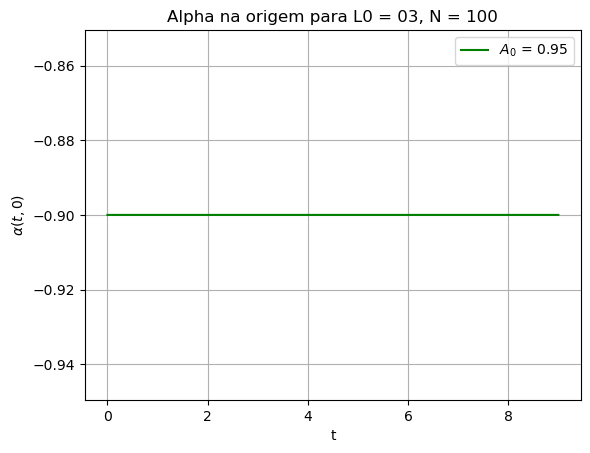

In [11]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

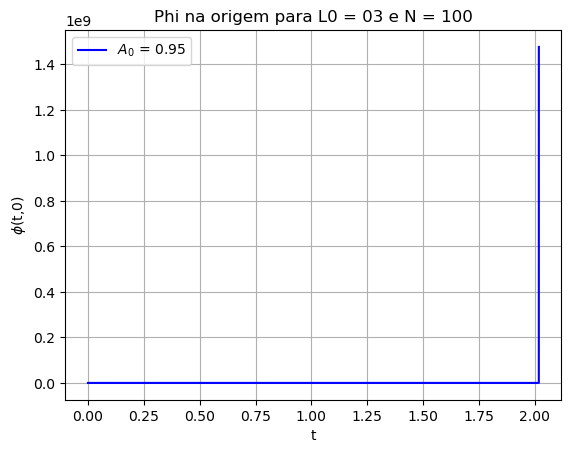

In [12]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [13]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

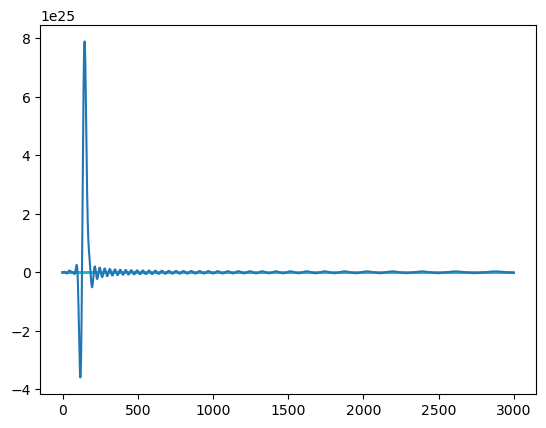

In [14]:
for i in range(It):
    plt.plot(phi_set[i])

NameError: name 'fig' is not defined

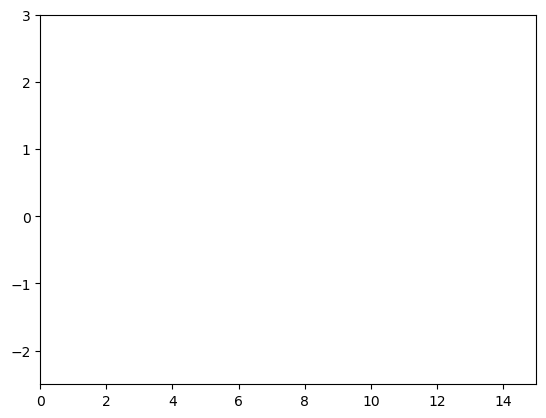

In [15]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
# 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

